# Telecom Churn case study

###### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal. 
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

###### Requirement:

- Analyse customer-level data of a leading telecom firm.
- Build predictive models to identify customers at high risk of churn.
- Identify the main indicators of churn.

###### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer

# settings to see the data.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data dictionary
dic = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

## Data Dictionary

In [3]:
dic

Acronyms      \
0   MOBILE_NUMBER   
1   CIRCLE_ID       
2   LOC             
3   STD             
4   IC              
5   OG              
6   T2T             
7   T2M             
8   T2O             
9   T2F             
10  T2C             
11  ARPU            
12  MOU             
13  AON             
14  ONNET           
15  OFFNET          
16  ROAM            
17  SPL             
18  ISD             
19  RECH            
20  NUM             
21  AMT             
22  MAX             
23  DATA            
24  3G              
25  AV              
26  VOL             
27  2G              
28  PCK             
29  NIGHT           
30  MONTHLY         
31  SACHET          
32  *.6             
33  *.7             
34  *.8             
35  *.9             
36  FB_USER         
37  VBC             

                                                                          Descriptions  
0   Customer phone number                                                               
1   Telecom circle area to which the customer belongs to                                
2   Local calls - within same telecom circle                                            
3   STD calls - outside the calling circle                                              
4   Incoming calls                                                                      
5   Outgoing calls                                                                      
6   Operator T to T, i.e. within same operator (mobile to mobile)                       
7   Operator T to other operator mobile                                                 
8   Operator T to other operator fixed line                                             
9   Operator T to fixed lines of T                                                      
10  Operator T to it’s own call center                                                  
11  Average revenue per user                                                            
12  Minutes of usage - voice calls                                                      
13  Age on network - number of days the customer is using the operator T network        
14  All kind of calls within the same operator network                                  
15  All kind of calls outside the operator T network                                    
16  Indicates that customer is in roaming zone during the call                          
17  Special calls                                                                       
18  ISD calls                                                                           
19  Recharge                                                                            
20  Number                                                                              
21  Amount in local currency                                                            
22  Maximum                                                                             
23  Mobile internet                                                                     
24  3G network                                                                          
25  Average                                                                             
26  Mobile internet usage volume (in MB)                                                
27  2G network                                                                          
28  Prepaid service schemes called - PACKS                                              
29  Scheme to use during specific night hours only                                      
30  Service schemes with validity equivalent to a month                                 
31  Service schemes with validity smaller than a month                                  
32  KPI for the month of June                                                           
33  KPI for the month of July                                                           
34  KPI for the month of August                                       

In [4]:
#Read the telecom churn csv file
telecom_churn_df = pd.read_csv("telecom_churn_data.csv")

In [5]:
telecom_churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109       0.000000        0.000000        0.000000          
1  7001865778     109       0.000000        0.000000        0.000000          
2  7001625959     109       0.000000        0.000000        0.000000          
3  7001204172     109       0.000000        0.000000        0.000000          
4  7000142493     109       0.000000        0.000000        0.000000          

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9     arpu_6     arpu_7     arpu_8     arpu_9  \
0  9/30/2014           197.385000 214.816000 213.803000 21.100000    
1  9/30/2014           34.047000  355.074000 268.321000 86.285000    
2  9/30/2014           167.690000 189.058000 210.226000 290.714000   
3  9/30/2014           221.338000 251.102000 508.054000 389.500000   
4  9/30/2014           261.636000 309.876000 238.174000 163.426000   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0 nan          nan          0.000000     nan          nan             
1 24.110000    78.680000    7.680000     18.340000    15.740000       
2 11.540000    55.240000    37.260000    74.810000    143.330000      
3 99.910000    54.390000    310.980000   241.710000   123.310000      
4 50.310000    149.440000   83.890000    58.780000    76.960000       

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0 nan           0.000000      nan           nan            nan              
1 99.840000     304.760000    53.760000     0.000000       0.000000         
2 220.590000    208.360000    118.910000    0.000000       0.000000         
3 109.010000    71.680000     113.540000    0.000000       54.860000        
4 91.880000     124.260000    45.810000     0.000000       0.000000         

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0 0.000000       nan            nan            nan            0.000000         
1 0.000000       0.000000       0.000000       0.000000       0.000000         
2 0.000000       38.490000      0.000000       0.000000       0.000000         
3 44.380000      0.000000       0.000000       28.090000      39.040000        
4 0.000000       0.000000       0.000000       0.000000       0.000000         

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0 nan            nan               nan               0.000000            
1 0.000000       23.880000         74.560000         7.680000            
2 70.940000      7.190000          28.740000         13.580000           
3 0.000000       73.680000         34.810000         10.610000           
4 0.000000       50.310000         149.440000        83.890000           

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0 nan               nan               nan               0.000000            
1 18.340000         11.510000         75.940000         291.860000          
2 14.390000         29.340000         16.860000         38.460000           
3 15.490000         107.430000        83.210000         22.460000           
4 58.780000         67.640000         91.880000         124.260000          

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0 nan               nan               nan               0.000000            
1 53.760000         0.000000          0.000000          0.000000            
2 28.160000         24.110000         21.790000         15.610000           
3 65.460000         1.910000          0.650000          4.910000            
4 37.890000         0.000000      

### Get unique elements in column

In [6]:
unique = telecom_churn_df.nunique()
unique

mobile_number               99999
circle_id                   1    
loc_og_t2o_mou              1    
std_og_t2o_mou              1    
loc_ic_t2o_mou              1    
last_date_of_month_6        1    
last_date_of_month_7        1    
last_date_of_month_8        1    
last_date_of_month_9        1    
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6               6512 
roam_ic_mou_7               5230 
roam_ic_mou_8               5315 
roam_ic_mou_9               4827 
roam_og_mou_6               8038 
roam_og_mou_7               6639 
roam_og_mou_8               6504 
roam_og_mou_9               5882 
loc_og_t2t_mou

In [7]:
#Eliminate columns with just 1 value
telecom_churn_df = telecom_churn_df[unique.index[unique.values>1]]

In [8]:
#Check for null values in the data columnwise
perc_na=round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)

In [9]:
header=['Name']
perc_na_df=pd.DataFrame(perc_na,columns=header)

In [10]:
#Columns having 0-5% null values
na_5 = perc_na_df[(perc_na_df['Name']<5.000) & (perc_na_df['Name']>00.00)]

In [11]:
#Columns having 5-10% null values
na_10 = perc_na_df[(perc_na_df['Name']<10.000) & (perc_na_df['Name']>05.00)]

In [12]:
#Columns having more than 70% null values
na_70 = perc_na_df[(perc_na_df['Name']>70.00)]

In [13]:
#Check for columns having between 10-70% null values
perc_na_df[(perc_na_df['Name']>10.000) & (perc_na_df['Name']<70.000)]

Empty DataFrame
Columns: [Name]
Index: []

#### No Columns with 10-70% Null values

In [14]:
#Find the columns which have more than 70% null values
perc_na_df[perc_na_df['Name']>70.000].count()

Name    40
dtype: int64

In [15]:
#Check unique values of each column having null vlaues greater than 70%
print("date_of_last_rech_data_6 --", telecom_churn_df.date_of_last_rech_data_6.unique())
print("date_of_last_rech_data_7 --", telecom_churn_df.date_of_last_rech_data_7.unique())
print("date_of_last_rech_data_8 --", telecom_churn_df.date_of_last_rech_data_8.unique())
print("date_of_last_rech_data_9 --", telecom_churn_df.date_of_last_rech_data_9.unique())
print("-"*100)
print("count_rech_2g_6 --", telecom_churn_df.count_rech_2g_6.unique())
print("count_rech_2g_7 --", telecom_churn_df.count_rech_2g_7.unique())
print("count_rech_2g_8 --", telecom_churn_df.count_rech_2g_8.unique())
print("count_rech_2g_9 --", telecom_churn_df.count_rech_2g_9.unique())
print("-"*100)
print("count_rech_3g_6 --", telecom_churn_df.count_rech_3g_6.unique())
print("count_rech_3g_7 --", telecom_churn_df.count_rech_3g_7.unique())
print("count_rech_3g_8 --", telecom_churn_df.count_rech_3g_8.unique())
print("count_rech_3g_9 --", telecom_churn_df.count_rech_3g_9.unique())
print("-"*100)
print("total_rech_data_6 --", telecom_churn_df.total_rech_data_6.unique())
print("total_rech_data_7 --", telecom_churn_df.total_rech_data_7.unique())
print("total_rech_data_8 --", telecom_churn_df.total_rech_data_8.unique())
print("total_rech_data_9 --", telecom_churn_df.total_rech_data_9.unique())
print("-"*100)
print("max_rech_data_6 --", telecom_churn_df.max_rech_data_6.unique())
print("max_rech_data_7 --", telecom_churn_df.max_rech_data_7.unique())
print("max_rech_data_8 --", telecom_churn_df.max_rech_data_8.unique())
print("max_rech_data_9 --", telecom_churn_df.max_rech_data_9.unique())
print("-"*100)
print("arpu_2g_6 --", telecom_churn_df.arpu_2g_6.unique())
print("arpu_2g_7 --", telecom_churn_df.arpu_2g_7.unique())
print("arpu_2g_8 --", telecom_churn_df.arpu_2g_8.unique())
print("arpu_2g_9 --", telecom_churn_df.arpu_2g_9.unique())
print("-"*100)
print("arpu_3g_6 --", telecom_churn_df.arpu_3g_6.unique())
print("arpu_3g_7 --", telecom_churn_df.arpu_3g_7.unique())
print("arpu_3g_8 --", telecom_churn_df.arpu_3g_8.unique())
print("arpu_3g_9 --", telecom_churn_df.arpu_3g_9.unique())
print("-"*100)
print("night_pck_user_6 --", telecom_churn_df.night_pck_user_6.unique())
print("night_pck_user_7 --", telecom_churn_df.night_pck_user_7.unique())
print("night_pck_user_8--", telecom_churn_df.night_pck_user_8.unique())
print("night_pck_user_9 --", telecom_churn_df.night_pck_user_9.unique())
print("-"*100)
print("fb_user_6 --", telecom_churn_df.fb_user_6.unique())
print("fb_user_7 --", telecom_churn_df.fb_user_7.unique())
print("fb_user_8 --", telecom_churn_df.fb_user_8.unique())
print("fb_user_9 --", telecom_churn_df.fb_user_9.unique())
print("-"*100)

date_of_last_rech_data_6 -- ['6/21/2014' nan '6/4/2014' '6/27/2014' '6/30/2014' '6/6/2014' '6/2/2014'
 '6/12/2014' '6/19/2014' '6/29/2014' '6/5/2014' '6/17/2014' '6/11/2014'
 '6/25/2014' '6/10/2014' '6/20/2014' '6/23/2014' '6/13/2014' '6/26/2014'
 '6/16/2014' '6/14/2014' '6/24/2014' '6/28/2014' '6/15/2014' '6/9/2014'
 '6/22/2014' '6/1/2014' '6/8/2014' '6/7/2014' '6/18/2014' '6/3/2014']
date_of_last_rech_data_7 -- ['7/16/2014' '7/25/2014' nan '7/31/2014' '7/23/2014' '7/7/2014'
 '7/27/2014' '7/2/2014' '7/28/2014' '7/12/2014' '7/4/2014' '7/5/2014'
 '7/6/2014' '7/26/2014' '7/19/2014' '7/10/2014' '7/11/2014' '7/29/2014'
 '7/18/2014' '7/9/2014' '7/24/2014' '7/14/2014' '7/13/2014' '7/22/2014'
 '7/30/2014' '7/20/2014' '7/21/2014' '7/15/2014' '7/8/2014' '7/17/2014'
 '7/1/2014' '7/3/2014']
date_of_last_rech_data_8 -- ['8/8/2014' '8/10/2014' nan '8/23/2014' '8/24/2014' '8/21/2014'
 '8/30/2014' '8/6/2014' '8/25/2014' '8/7/2014' '8/26/2014' '8/11/2014'
 '8/2/2014' '8/31/2014' '8/20/2014' '8/29/2014

## Data Cleaning

In [16]:
#As Night pack user and fb user columns have only 0 and 1s. Let's impute by adding min value
for column in telecom_churn_df.filter(regex ='user').columns:
    telecom_churn_df[column].replace(np.nan, 0, inplace = True)

In [17]:
# drop column with > 70% missing values
telecom_churn_df.drop(na_70.index, axis=1, inplace=True)

In [18]:
#After imputing all the variables having null values more than 70%, let's verify the null values which are above 70%
perc_na=round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)
perc_na.where(perc_na>10).count()

0

In [19]:
telecom_churn_df.shape

(99999, 170)

In [20]:
round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2).max()

7.75

In [21]:
#impute date columns
date_columns = telecom_churn_df.filter(regex ='date').columns

In [22]:
for d in date_columns:
    telecom_churn_df[d] = pd.to_datetime(telecom_churn_df[d]).dt.day
    telecom_churn_df[d].fillna(int(telecom_churn_df[d].mean()), inplace=True)

In [23]:
#check the type of  variables in data frame
telecom_churn_df.dtypes.value_counts()

float64    136
int64      34 
dtype: int64

### Impute columns where nan values % is less than 10

In [24]:
#impute the missing values for variables having upto 10%
perc_na_df_10=perc_na_df[(perc_na_df['Name']<10) & (perc_na_df['Name']>0)]
perc_na_df_10.count()

Name    112
dtype: int64

In [25]:
columns_name = telecom_churn_df.columns

In [26]:
# Impute remaining values using iterative imputer
telecom_churn_df = pd.DataFrame(IterativeImputer().fit_transform(telecom_churn_df))

In [27]:
#Check if null values exist
telecom_churn_df.isnull().sum().sum()

0

In [28]:
telecom_churn_df.columns = columns_name
telecom_churn_df.shape

(99999, 170)

### Find the High Value Customer

In [29]:
telecom_churn_df.head()

mobile_number     arpu_6     arpu_7     arpu_8     arpu_9  onnet_mou_6  \
0 7000842753.000000 197.385000 214.816000 213.803000 21.100000  132.159077     
1 7001865778.000000 34.047000  355.074000 268.321000 86.285000  24.110000      
2 7001625959.000000 167.690000 189.058000 210.226000 290.714000 11.540000      
3 7001204172.000000 221.338000 251.102000 508.054000 389.500000 99.910000      
4 7000142493.000000 261.636000 309.876000 238.174000 163.426000 50.310000      

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 132.780808   0.000000     130.406958   198.678034    197.367562      
1 78.680000    7.680000     18.340000    15.740000     99.840000       
2 55.240000    37.260000    74.810000    143.330000    220.590000      
3 54.390000    310.980000   241.710000   123.310000    109.010000      
4 149.440000   83.890000    58.780000    76.960000     91.880000       

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0 0.000000      190.508519    21.241086      -6.783838      0.000000         
1 304.760000    53.760000     0.000000       0.000000       0.000000         
2 208.360000    118.910000    0.000000       0.000000       0.000000         
3 71.680000     113.540000    0.000000       54.860000      44.380000        
4 124.260000    45.810000     0.000000       0.000000       0.000000         

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 7.458287       26.493654      36.863849      0.000000       5.553218         
1 0.000000       0.000000       0.000000       0.000000       0.000000         
2 38.490000      0.000000       0.000000       0.000000       70.940000        
3 0.000000       0.000000       28.090000      39.040000      0.000000         
4 0.000000       0.000000       0.000000       0.000000       0.000000         

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 47.100663         46.472605         0.000000          44.584949           
1 23.880000         74.560000         7.680000          18.340000           
2 7.190000          28.740000         13.580000         14.390000           
3 73.680000         34.810000         10.610000         15.490000           
4 50.310000         149.440000        83.890000         58.780000           

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 93.342697         91.398022         0.000000          90.463234           
1 11.510000         75.940000         291.860000        53.760000           
2 29.340000         16.860000         38.460000         28.160000           
3 107.430000        83.210000         22.460000         65.460000           
4 67.640000         91.880000         124.260000        37.890000           

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 7.676167          8.382031          0.000000          7.486639            
1 0.000000          0.000000          0.000000          0.000000            
2 24.110000         21.790000         15.610000         22.240000           
3 1.910000          0.650000          4.910000          2.060000            
4 0.000000          0.000000          0.000000          1.930000            

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0 16.477023         -0.203203         0.000000          -1.270673           
1 0.000000          2.910000          0.000000          0.000000            
2 0.000000          135.540000        45.760000         0.480000            
3 0.000000          0.000000          0.000000          0.000000            
4 0.000000          0.000000          0.000000          0.000000            

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0 141.945032    139.520842    0.000000      137.049851    79.831593           
1 35.390000     150.510000    299.540000    72.110000     0.230000            
2 60.660000     67.410000     67.660000     64.810000

#### Get total recharge amount for 6th and 7th months - Good phase

In [30]:
telecom_churn_df.total_rech_amt_avg = (telecom_churn_df.total_rech_amt_6 +telecom_churn_df.total_rech_amt_7)/2

##### Find total recharge amount for 6th and 7th months - Good phase

In [31]:
#Finding good phase for filtering HVC
telecom_churn_df.total_rech_amt_good_phase=(telecom_churn_df.total_rech_amt_avg)

In [32]:
telecom_churn_df.total_rech_amt_good_phase.describe()

count   99999.000000
mean    325.238792  
std     370.833466  
min     0.000000    
25%     115.000000  
50%     229.000000  
75%     419.000000  
max     37762.500000
dtype: float64

Compute the 70 percentile of High Value Customer data set

In [33]:
_70percentile = telecom_churn_df.total_rech_amt_good_phase.quantile(q=0.7)

In [34]:
print(_70percentile)

368.5


##### Fetching High Value customer of more than 70th percentile(inclusive) of data set

In [35]:
telecom_churn_df_high = telecom_churn_df[(telecom_churn_df.total_rech_amt_good_phase >= _70percentile)]

In [36]:
telecom_churn_df_high.describe()

mobile_number       arpu_6       arpu_7       arpu_8       arpu_9  \
count 30011.000000      30011.000000 30011.000000 30011.000000 30011.000000   
mean  7001222923.595415 587.284404   589.135427   534.857433   488.656197     
std   684640.490765     442.722413   462.897814   492.259586   496.486834     
min   7000000074.000000 -2258.709000 -2014.045000 -945.808000  -1899.505000   
25%   7000641091.500000 364.161000   365.004500   289.609500   239.184000     
50%   7001231966.000000 495.682000   493.561000   452.091000   413.152000     
75%   7001813975.000000 703.922000   700.788000   671.150000   635.553000     
max   7002410905.000000 27731.088000 35145.834000 33543.624000 38805.617000   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count 30011.000000 30011.000000 30011.000000 30011.000000 30011.000000    
mean  297.426961   305.681413   271.906512   248.131988   420.026711      
std   460.078144   481.116920   464.703363   439.823849   469.164806      
min   0.000000     0.000000     0.000000     0.000000     0.000000        
25%   43.510000    43.260000    33.985000    29.020000    142.825000      
50%   130.710000   130.340000   113.090000   106.940000   282.190000      
75%   353.310000   359.925000   297.735000   260.785000   523.125000      
max   7376.710000  8157.780000  10752.560000 10427.460000 8362.360000     

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count 30011.000000  30011.000000  30011.000000  30011.000000   30011.000000     
mean  425.918306    381.038390    347.912595    17.670644      13.454263        
std   485.186719    473.925393    438.512426    79.189081      76.393454        
min   0.000000      0.000000      0.000000      -161.454113    -121.198907      
25%   141.235000    111.730000    96.350000     0.000000       0.000000         
50%   281.940000    240.940000    208.240000    0.000000       0.000000         
75%   532.695000    482.610000    434.430000    0.000000       0.000000         
max   9667.130000   14007.340000  10310.760000  2613.310000    3813.290000      

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count 30011.000000   30011.000000   30011.000000   30011.000000     
mean  13.923626      12.096182      29.601554      22.411047        
std   74.839554      68.442302      118.535193     97.957849        
min   -390.654301    -249.780454    -80.771424     -46.943012       
25%   0.000000       0.000000       0.000000       0.000000         
50%   0.000000       0.000000       0.000000       0.000000         
75%   0.000000       0.000000       0.000000       0.000000         
max   4169.810000    3220.660000    3775.110000    2812.040000      

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count 30011.000000   30011.000000   30011.000000      30011.000000        
mean  22.416332      17.551945      95.176641         96.198930           
std   106.218541     90.152698      236.699752        247.995057          
min   -44.340888     -62.858062     0.000000          0.000000            
25%   0.000000       0.000000       8.990000          9.760000            
50%   0.000000       0.000000       34.010000         34.690000           
75%   0.000000       0.000000       91.460000         91.480000           
max   5337.040000    4428.460000    6431.330000       7400.660000         

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count 30011.000000      30011.000000      30011.000000      30011.000000        
mean  88.574223         83.286762         182.262433        182.194307          
std   234.324947        227.265357        249.600634        240.200078          
min   0.000000          0.000000          0.000000          0.000000            
25%   7.760000          6.835000          32.210000         35.560000           
50%   33.130000         32.610000         101.240000        104.340000          
75%   84.670000         78.

In [37]:
round(100*(telecom_churn_df_high.isnull().sum()/len(telecom_churn_df_high.index)), 2)

mobile_number         0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           0.000000
onnet_mou_7           0.000000
onnet_mou_8           0.000000
onnet_mou_9           0.000000
offnet_mou_6          0.000000
offnet_mou_7          0.000000
offnet_mou_8          0.000000
offnet_mou_9          0.000000
roam_ic_mou_6         0.000000
roam_ic_mou_7         0.000000
roam_ic_mou_8         0.000000
roam_ic_mou_9         0.000000
roam_og_mou_6         0.000000
roam_og_mou_7         0.000000
roam_og_mou_8         0.000000
roam_og_mou_9         0.000000
loc_og_t2t_mou_6      0.000000
loc_og_t2t_mou_7      0.000000
loc_og_t2t_mou_8      0.000000
loc_og_t2t_mou_9      0.000000
loc_og_t2m_mou_6      0.000000
loc_og_t2m_mou_7      0.000000
loc_og_t2m_mou_8      0.000000
loc_og_t2m_mou_9      0.000000
loc_og_t2f_mou_6      0.000000
loc_og_t2f_mou_7      0.000000
loc_og_t2f_mou_8      0.000000
loc_og_t

##### Including churn information to dataframe

In [38]:
telecom_churn_df_high['usage_9'] = telecom_churn_df_high['total_ic_mou_9'] + telecom_churn_df_high['total_og_mou_9'] + telecom_churn_df_high['vol_3g_mb_9'] + telecom_churn_df_high['vol_2g_mb_9']

##### Get the churn data from 9th(Sept) month of data

In [39]:
telecom_churn_df_high["churn_data"] = [1 if value == 0 else 0 for value in telecom_churn_df_high.usage_9]

In [40]:
telecom_churn_df_high["churn_data"].describe()

count   30011.000000
mean    0.086402    
std     0.280961    
min     0.000000    
25%     0.000000    
50%     0.000000    
75%     0.000000    
max     1.000000    
Name: churn_data, dtype: float64

Review the churn data percentage 

In [41]:
(telecom_churn_df_high["churn_data"].sum()/telecom_churn_df_high["churn_data"].count())*100

8.64016527273333

Dropping 9th(Sept) month columns from data set 

In [42]:
drop_columns = telecom_churn_df_high.filter(regex ='9').columns
telecom_churn_df_high.drop(drop_columns, axis=1,inplace=True)

In [43]:
#Checking the shape of clean data after finding high value customers
telecom_churn_df_high.shape

(30011, 130)

## Derived metrics

In [44]:
# Find out ratio of revenue on happy/action phase
telecom_churn_df_high['arpu_ratio'] = ((telecom_churn_df_high.arpu_6 + telecom_churn_df_high.arpu_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.arpu_8]

In [45]:
# Find out if customer centre call were made more in action phase
telecom_churn_df_high['call_centre_ratio'] = ((telecom_churn_df_high.loc_og_t2c_mou_6 + telecom_churn_df_high.loc_og_t2c_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.loc_og_t2c_mou_8]

In [46]:
# Find out ratio of usage from other network
telecom_churn_df_high['network_usage_diff'] = (telecom_churn_df_high.onnet_mou_8) - ( telecom_churn_df_high.offnet_mou_8)
# Find out ratio of usage from other network
telecom_churn_df_high['network_usage_diff_good'] = (telecom_churn_df_high.onnet_mou_6 + telecom_churn_df_high.onnet_mou_7 - telecom_churn_df_high.offnet_mou_6 - telecom_churn_df_high.offnet_mou_6)/2

In [47]:
# Find ratio of good/action for 2g
telecom_churn_df_high['2g_usage_ratio'] = ((telecom_churn_df_high.vol_2g_mb_6 + telecom_churn_df_high.vol_2g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.vol_2g_mb_8]

In [48]:
# Find ratio of good/action for 3g
telecom_churn_df_high['3g_usage_ratio'] = ((telecom_churn_df_high.vol_3g_mb_6 + telecom_churn_df_high.vol_3g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.vol_3g_mb_8]

In [49]:
# Find ratio of good/action for outgoing call
telecom_churn_df_high['og_ratio'] = ((telecom_churn_df_high.total_og_mou_6 + telecom_churn_df_high.total_og_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.total_og_mou_8]

In [50]:
# Find ratio of good/action for outgoing call
telecom_churn_df_high['ic_ratio'] = ((telecom_churn_df_high.total_ic_mou_6 + telecom_churn_df_high.total_ic_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.total_ic_mou_8]

In [51]:
# Find ratio of good/action for vbc
telecom_churn_df_high['vbc_difference'] = ((telecom_churn_df_high.jun_vbc_3g + telecom_churn_df_high.jul_vbc_3g)/2) - [1 if x ==0 else x for x in telecom_churn_df_high.aug_vbc_3g]

# EDA

In [52]:
# checking variance to see which columns hold most information
round(100*(np.var(telecom_churn_df_high.drop('mobile_number' , axis =1))/np.var(telecom_churn_df_high.drop('mobile_number' , axis =1)).sum()), 2).sort_values().tail()

vol_3g_mb_7   4.370000 
vol_3g_mb_8   4.400000 
vol_3g_mb_6   4.480000 
aon           5.670000 
arpu_ratio    12.260000
dtype: float64

In [53]:
telecom_churn_df_high.describe()

mobile_number       arpu_6       arpu_7       arpu_8  onnet_mou_6  \
count 30011.000000      30011.000000 30011.000000 30011.000000 30011.000000   
mean  7001222923.595415 587.284404   589.135427   534.857433   297.426961     
std   684640.490765     442.722413   462.897814   492.259586   460.078144     
min   7000000074.000000 -2258.709000 -2014.045000 -945.808000  0.000000       
25%   7000641091.500000 364.161000   365.004500   289.609500   43.510000      
50%   7001231966.000000 495.682000   493.561000   452.091000   130.710000     
75%   7001813975.000000 703.922000   700.788000   671.150000   353.310000     
max   7002410905.000000 27731.088000 35145.834000 33543.624000 7376.710000    

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count 30011.000000 30011.000000 30011.000000  30011.000000  30011.000000    
mean  305.681413   271.906512   420.026711    425.918306    381.038390      
std   481.116920   464.703363   469.164806    485.186719    473.925393      
min   0.000000     0.000000     0.000000      0.000000      0.000000        
25%   43.260000    33.985000    142.825000    141.235000    111.730000      
50%   130.340000   113.090000   282.190000    281.940000    240.940000      
75%   359.925000   297.735000   523.125000    532.695000    482.610000      
max   8157.780000  10752.560000 8362.360000   9667.130000   14007.340000    

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count 30011.000000   30011.000000   30011.000000   30011.000000     
mean  17.670644      13.454263      13.923626      29.601554        
std   79.189081      76.393454      74.839554      118.535193       
min   -161.454113    -121.198907    -390.654301    -80.771424       
25%   0.000000       0.000000       0.000000       0.000000         
50%   0.000000       0.000000       0.000000       0.000000         
75%   0.000000       0.000000       0.000000       0.000000         
max   2613.310000    3813.290000    4169.810000    3775.110000      

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count 30011.000000   30011.000000   30011.000000      30011.000000        
mean  22.411047      22.416332      95.176641         96.198930           
std   97.957849      106.218541     236.699752        247.995057          
min   -46.943012     -44.340888     0.000000          0.000000            
25%   0.000000       0.000000       8.990000          9.760000            
50%   0.000000       0.000000       34.010000         34.690000           
75%   0.000000       0.000000       91.460000         91.480000           
max   2812.040000    5337.040000    6431.330000       7400.660000         

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count 30011.000000      30011.000000      30011.000000      30011.000000        
mean  88.574223         182.262433        182.194307        170.459041          
std   234.324947        249.600634        240.200078        233.353854          
min   0.000000          0.000000          0.000000          0.000000            
25%   7.760000          32.210000         35.560000         28.480000           
50%   33.130000         101.240000        104.340000        91.755742           
75%   84.670000         240.165000        239.485000        223.590000          
max   10752.560000      4729.740000       4557.140000       4961.330000         

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count 30011.000000      30011.000000      30011.000000      30011.000000        
mean  7.060153          7.181893          6.729184          1.741194            
std   22.654171         22.577814         20.186843         7.055759            
min   0.000000          0.000000          0.000000          0.000000            
25%   0.000000          0.000000          0.000000          0.000000            
50%   0.430000          0.480000          0.450000          0.000000            
75%   5.5

# Univariate analysis

mobile_number


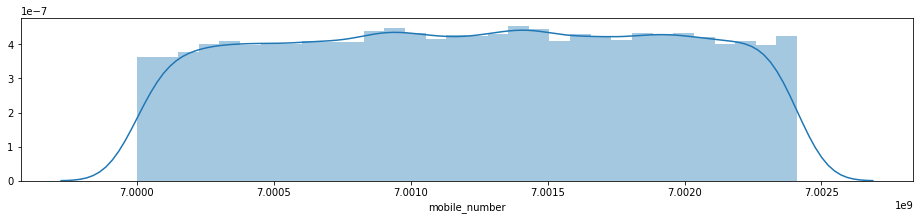

arpu_6


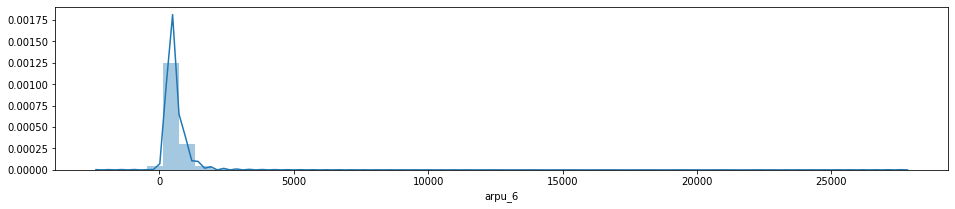

arpu_7


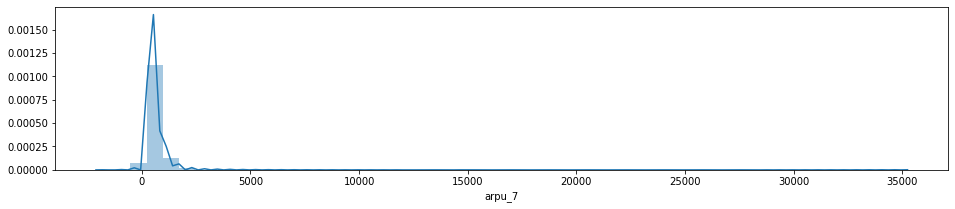

arpu_8


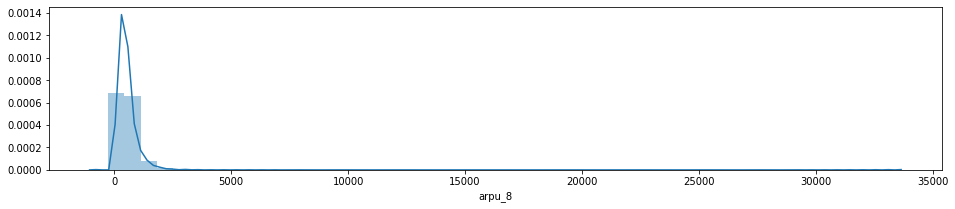

onnet_mou_6


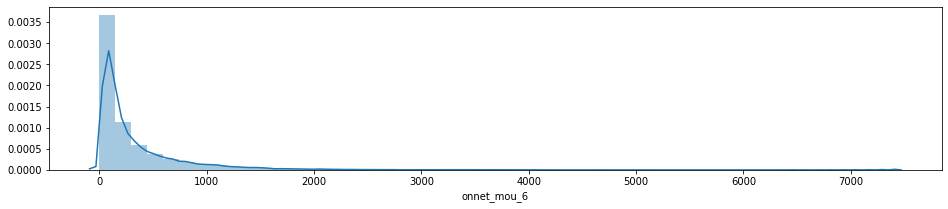

onnet_mou_7


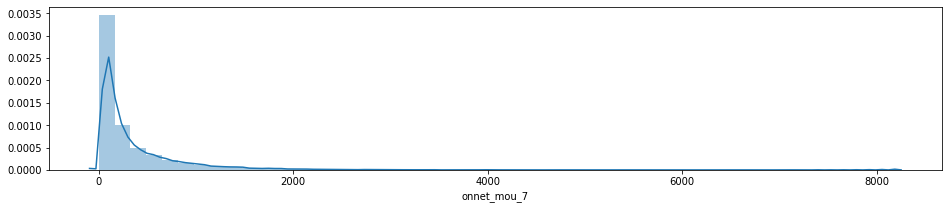

onnet_mou_8


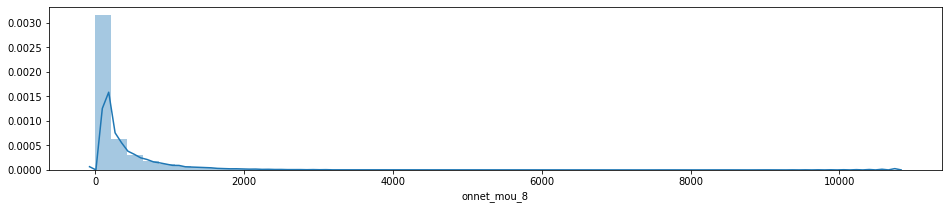

offnet_mou_6


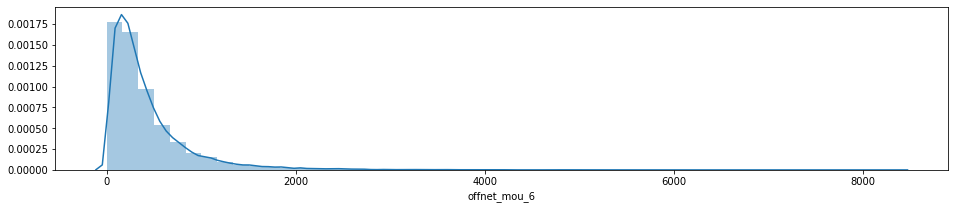

offnet_mou_7


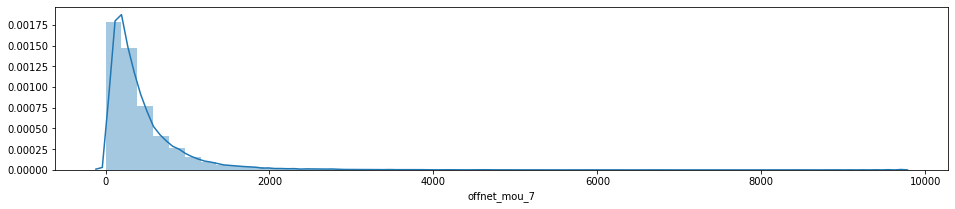

offnet_mou_8


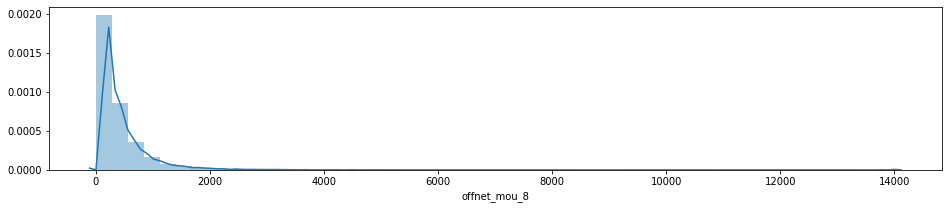

roam_ic_mou_6


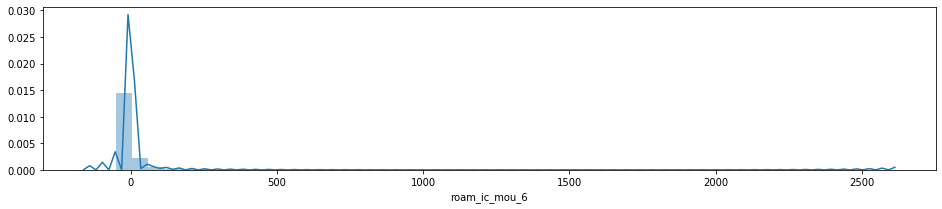

roam_ic_mou_7


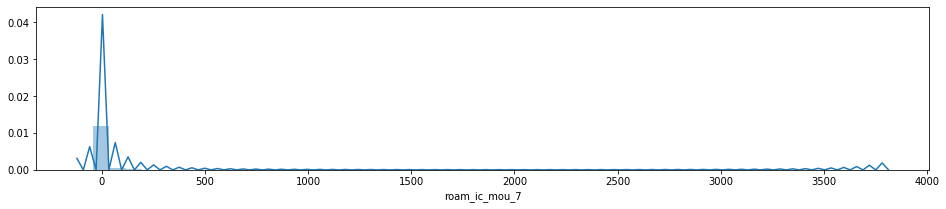

roam_ic_mou_8


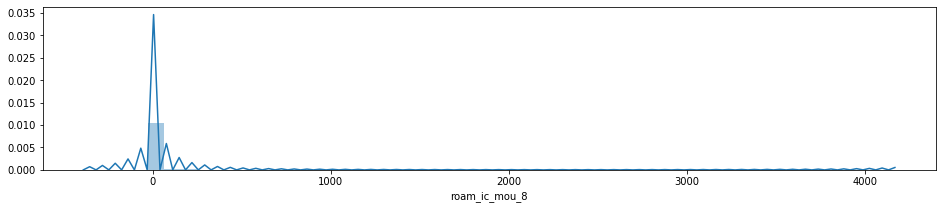

roam_og_mou_6


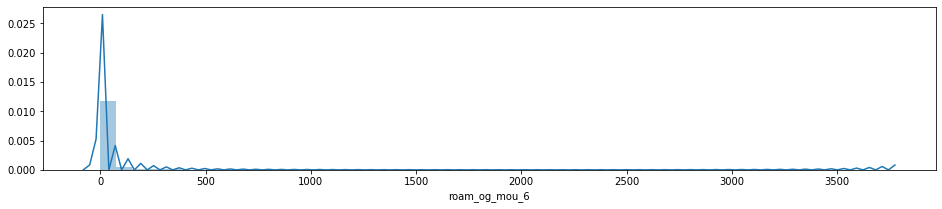

roam_og_mou_7


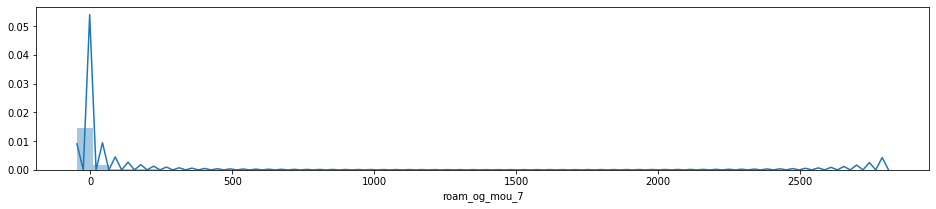

roam_og_mou_8


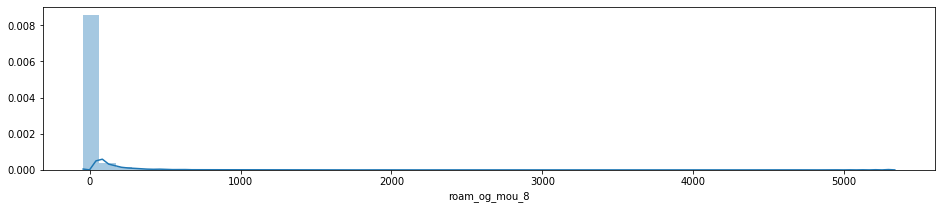

loc_og_t2t_mou_6


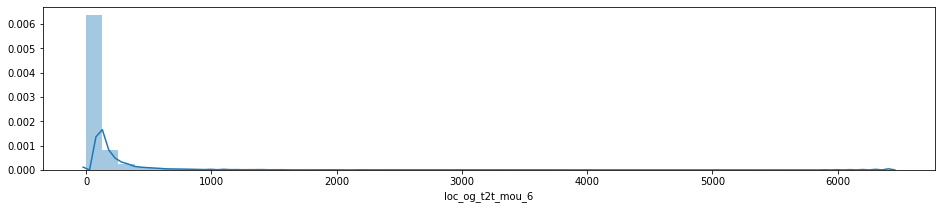

loc_og_t2t_mou_7


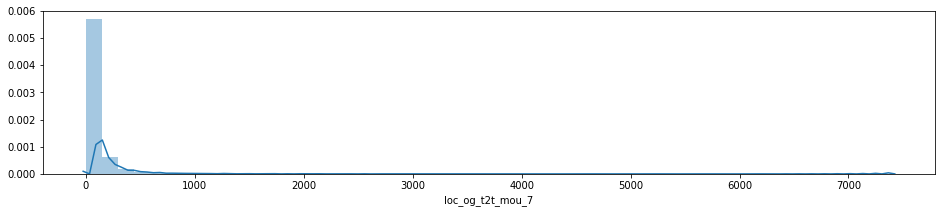

loc_og_t2t_mou_8


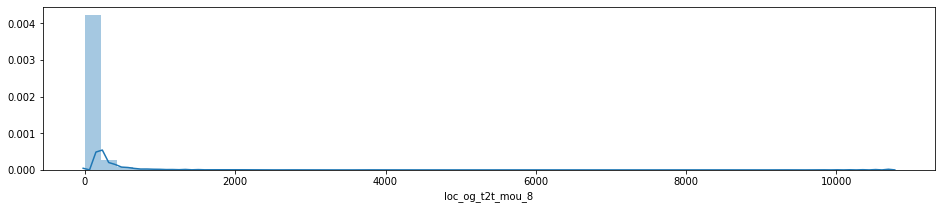

loc_og_t2m_mou_6


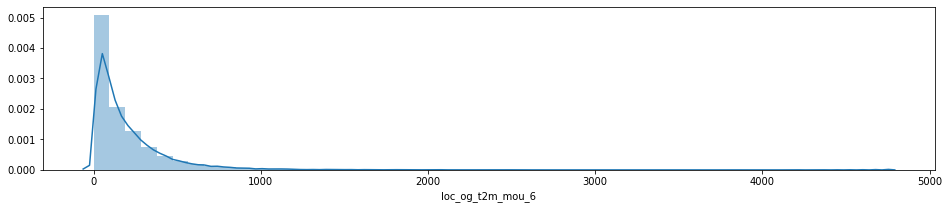

loc_og_t2m_mou_7


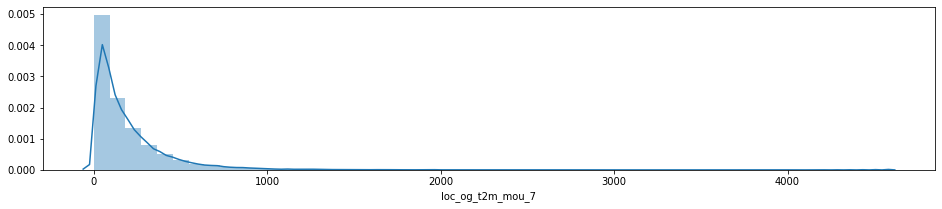

loc_og_t2m_mou_8


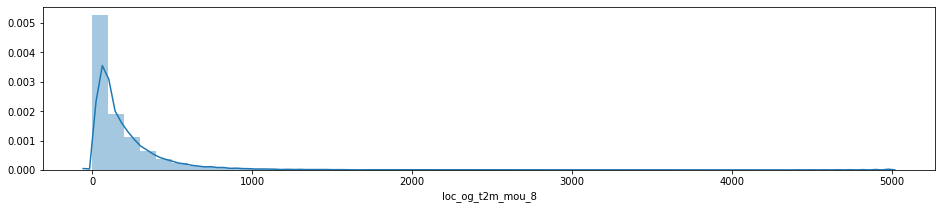

loc_og_t2f_mou_6


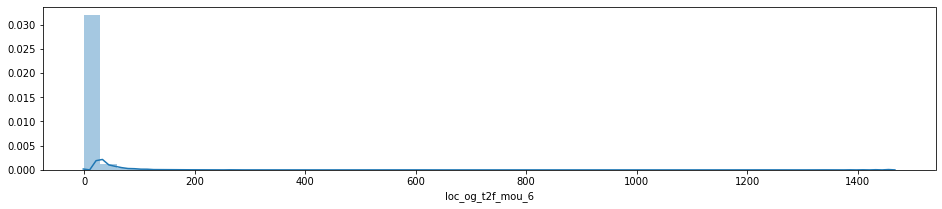

loc_og_t2f_mou_7


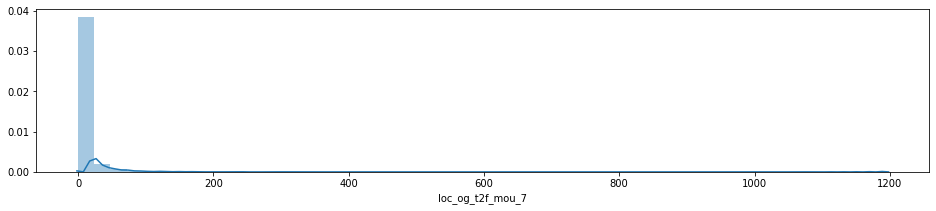

loc_og_t2f_mou_8


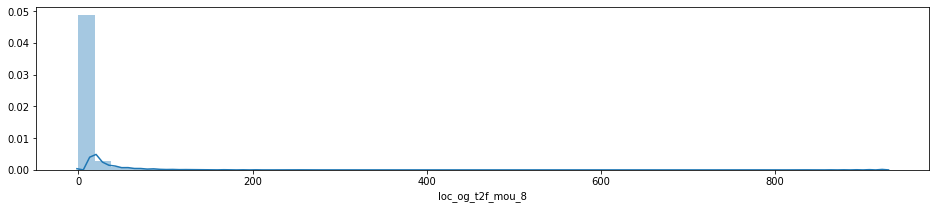

loc_og_t2c_mou_6


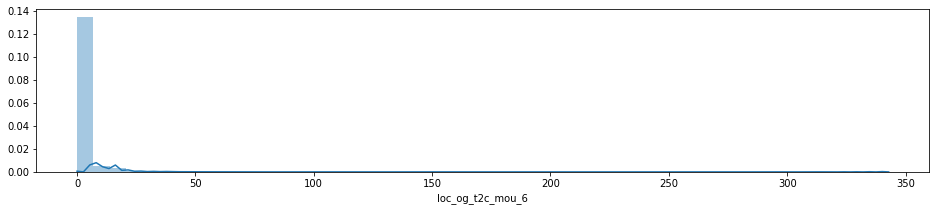

loc_og_t2c_mou_7


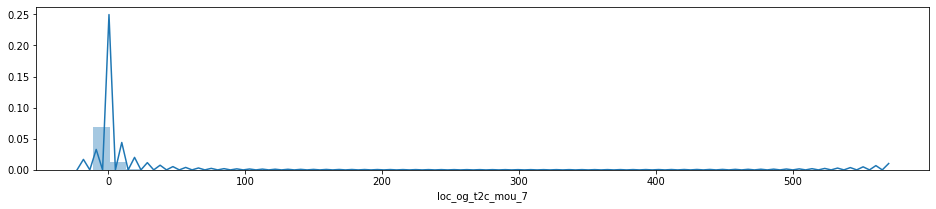

loc_og_t2c_mou_8


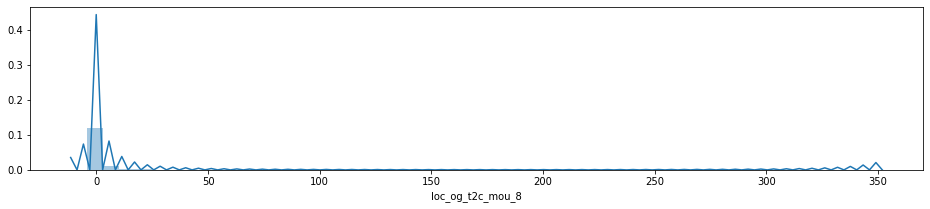

loc_og_mou_6


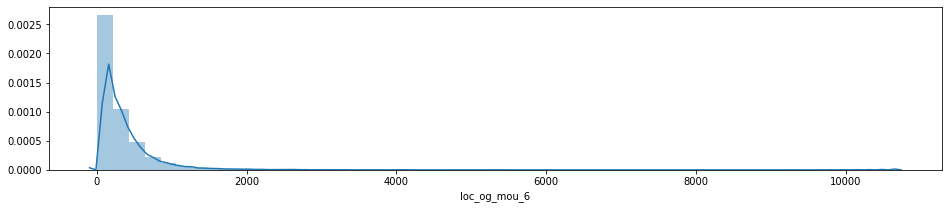

loc_og_mou_7


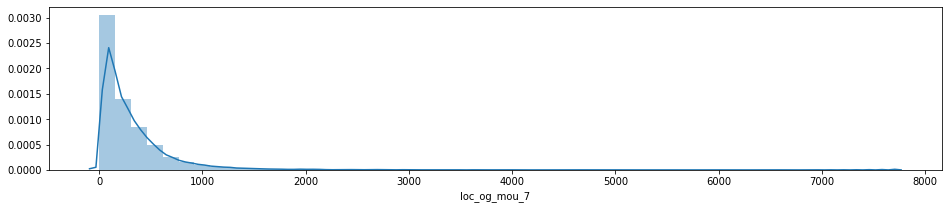

loc_og_mou_8


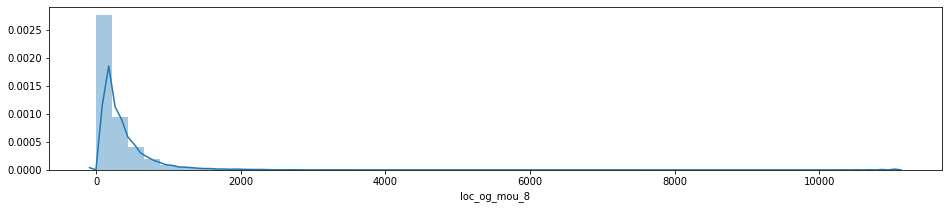

std_og_t2t_mou_6


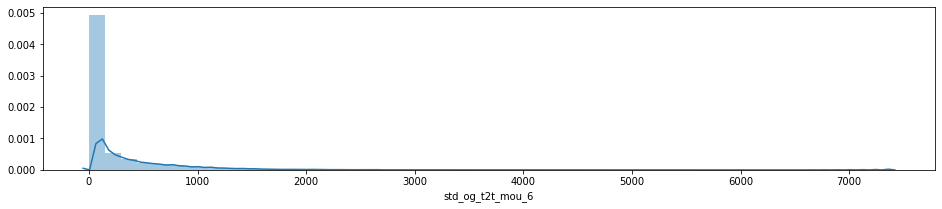

std_og_t2t_mou_7


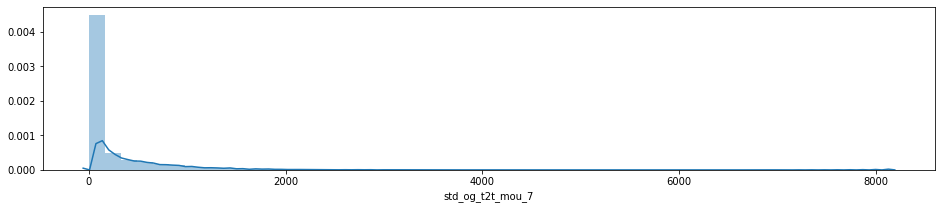

std_og_t2t_mou_8


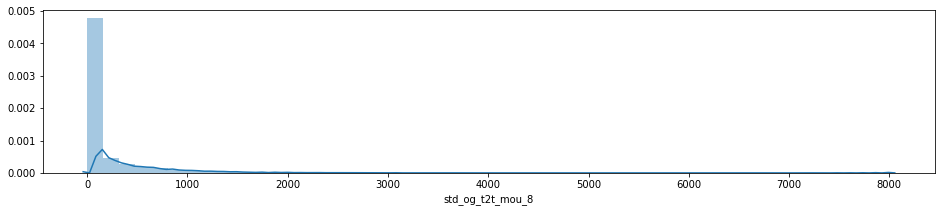

std_og_t2m_mou_6


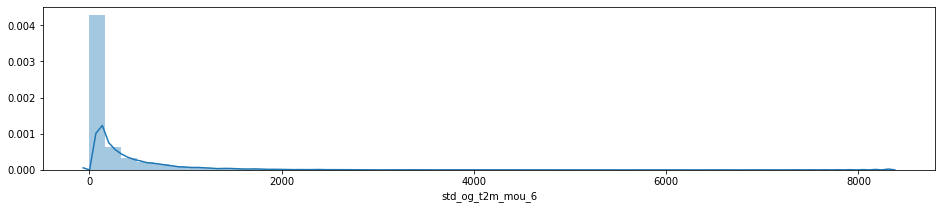

std_og_t2m_mou_7


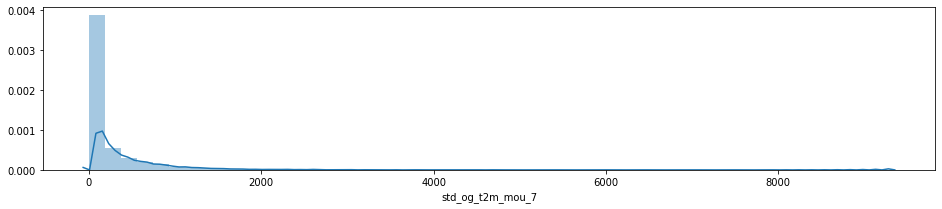

std_og_t2m_mou_8


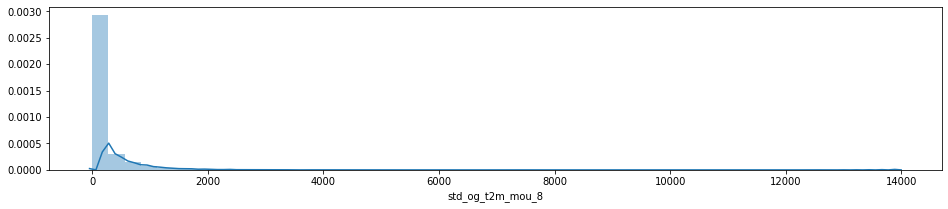

std_og_t2f_mou_6


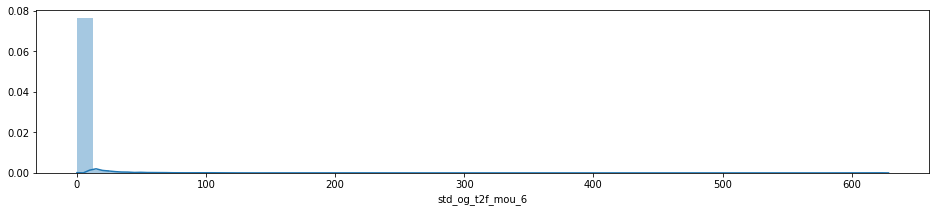

std_og_t2f_mou_7


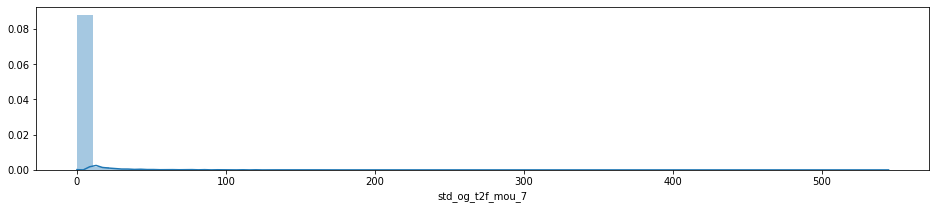

std_og_t2f_mou_8


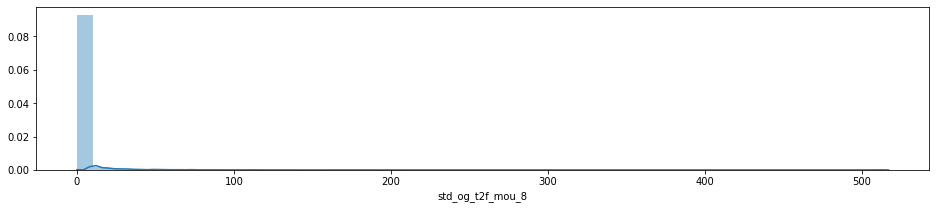

std_og_mou_6


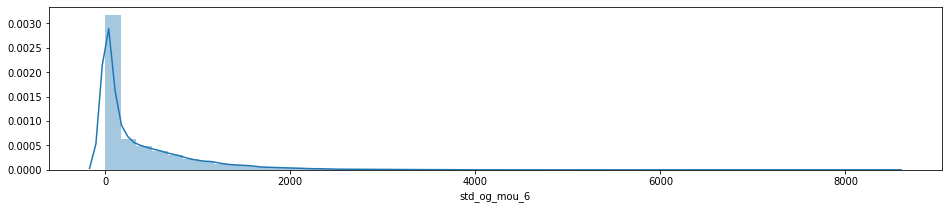

std_og_mou_7


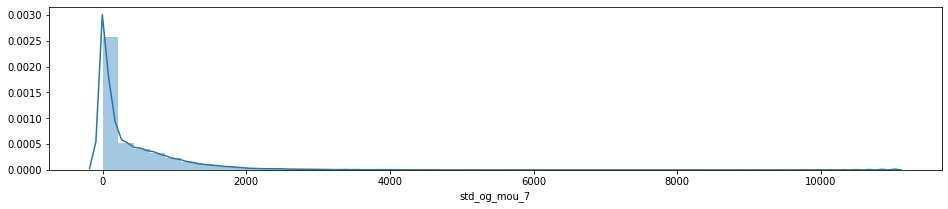

std_og_mou_8


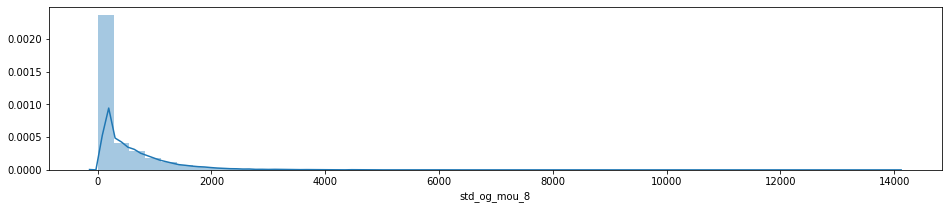

isd_og_mou_6


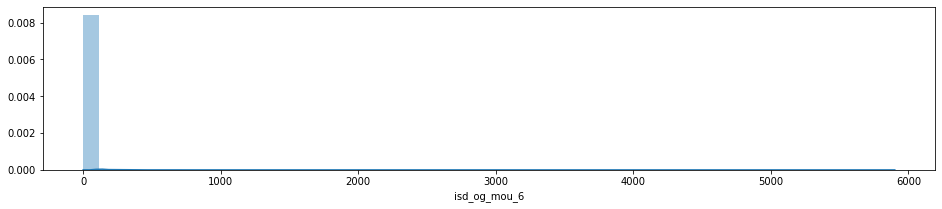

isd_og_mou_7


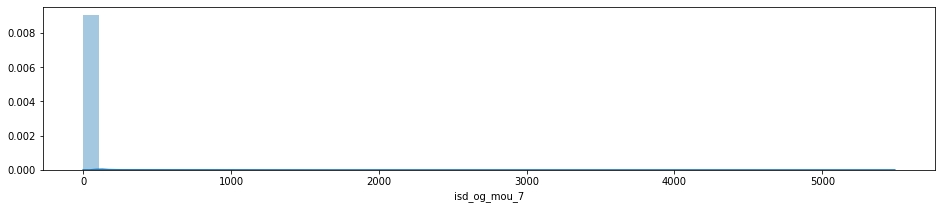

isd_og_mou_8


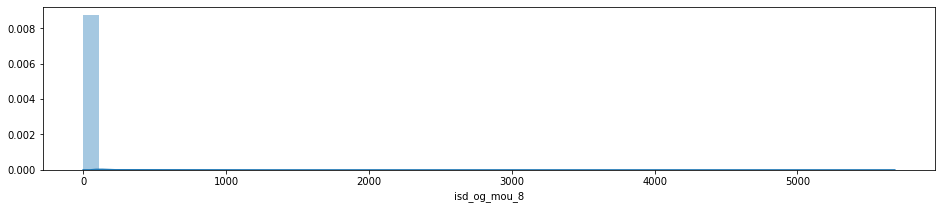

spl_og_mou_6


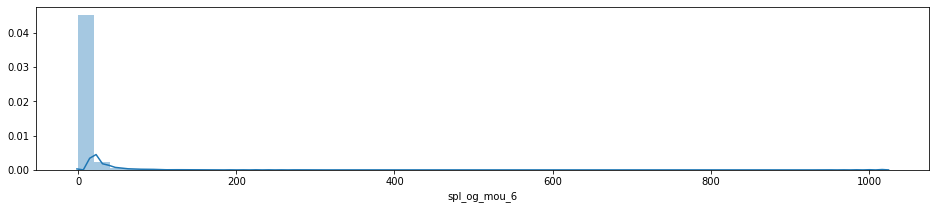

spl_og_mou_7


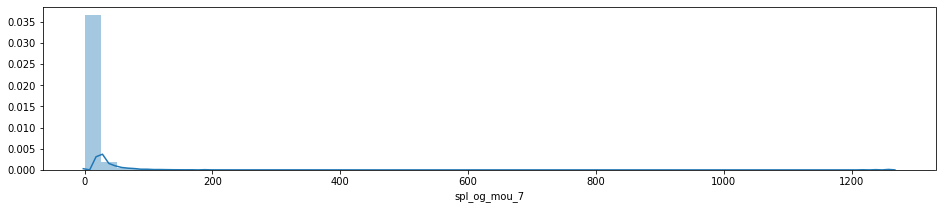

spl_og_mou_8


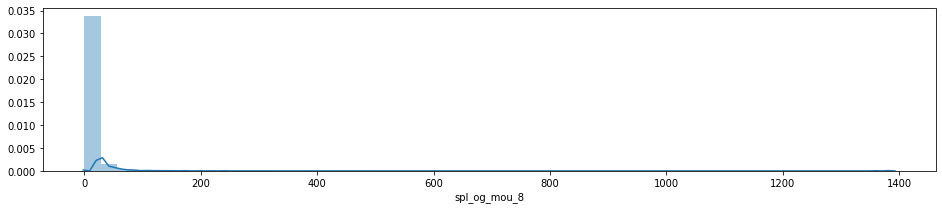

og_others_6


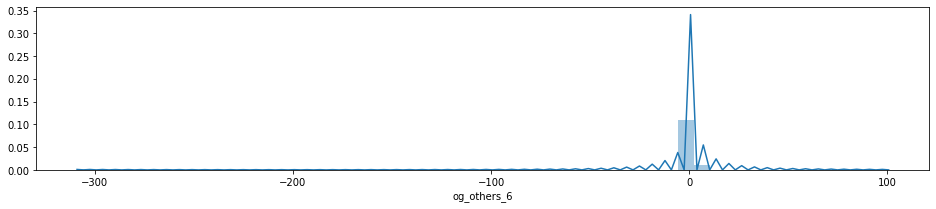

og_others_7


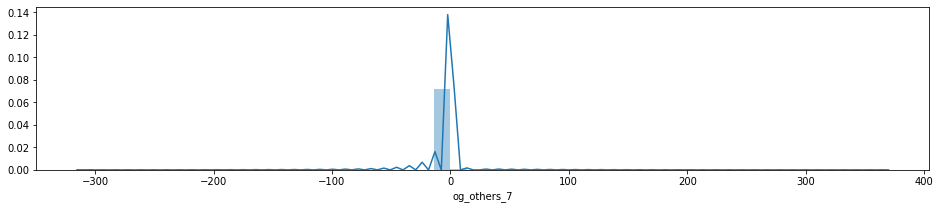

og_others_8


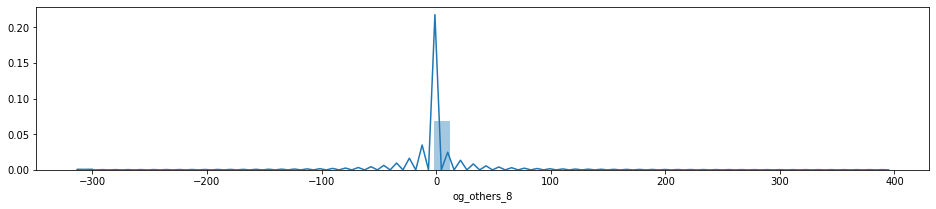

total_og_mou_6


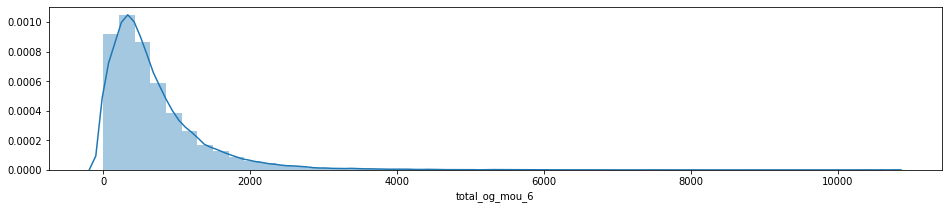

total_og_mou_7


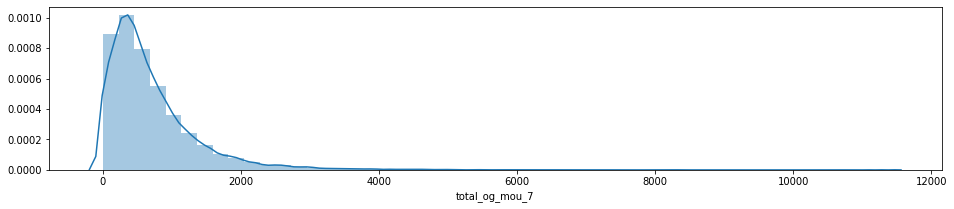

total_og_mou_8


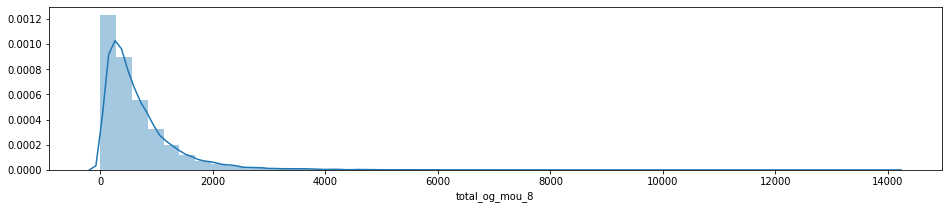

loc_ic_t2t_mou_6


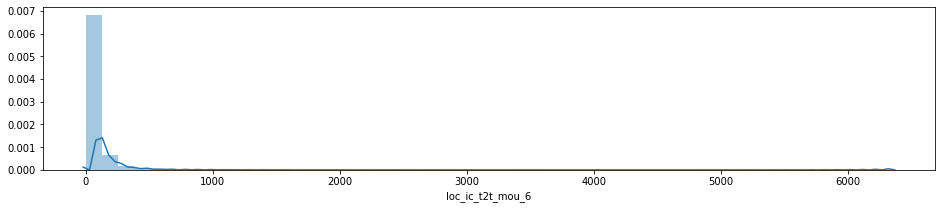

loc_ic_t2t_mou_7


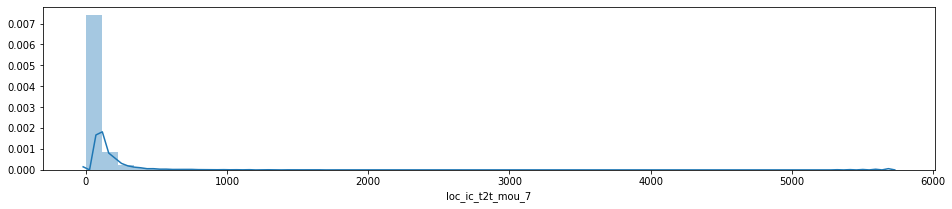

loc_ic_t2t_mou_8


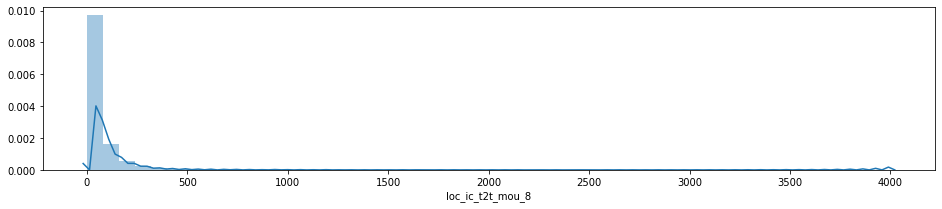

loc_ic_t2m_mou_6


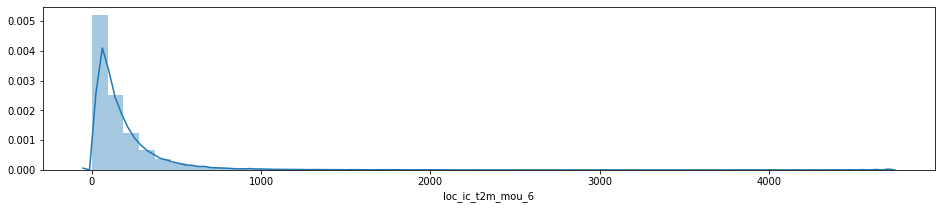

loc_ic_t2m_mou_7


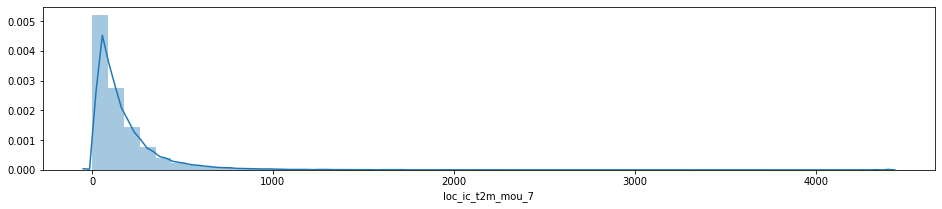

loc_ic_t2m_mou_8


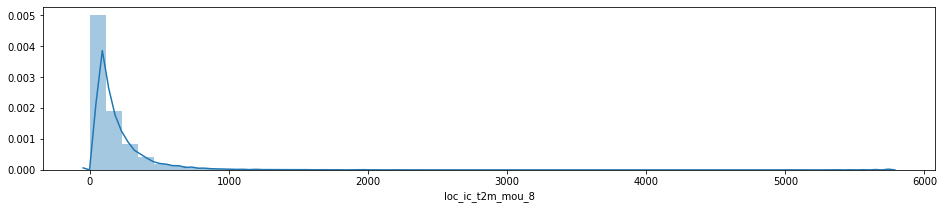

loc_ic_t2f_mou_6


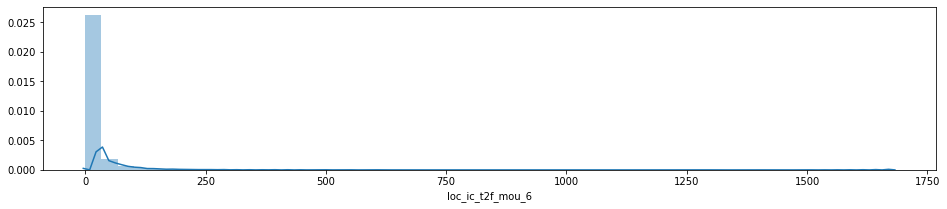

loc_ic_t2f_mou_7


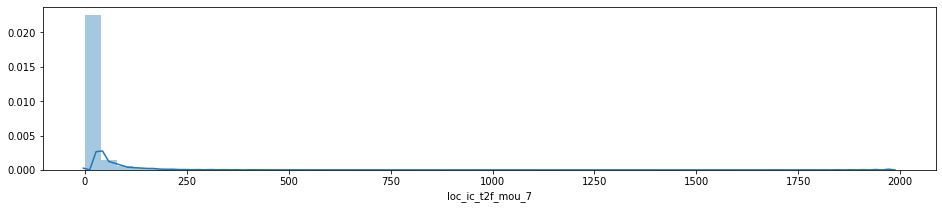

loc_ic_t2f_mou_8


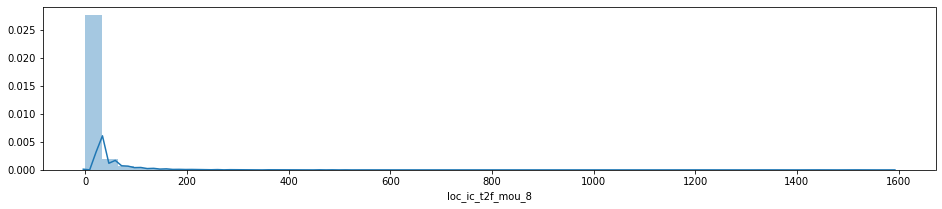

loc_ic_mou_6


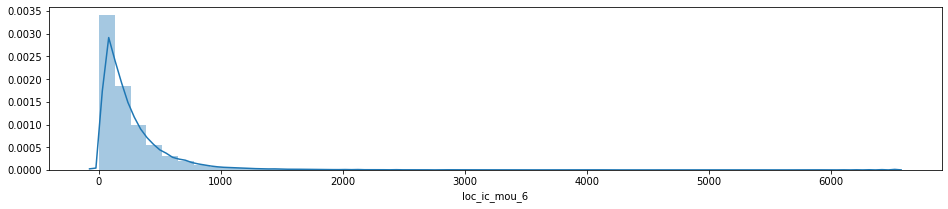

loc_ic_mou_7


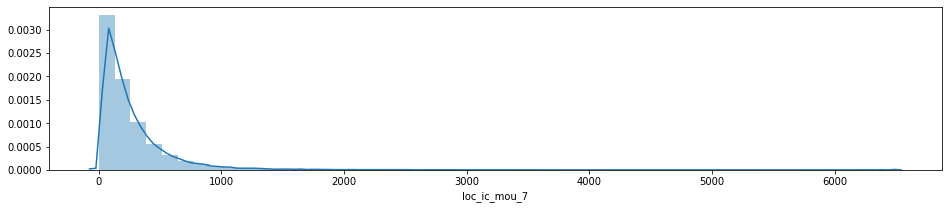

loc_ic_mou_8


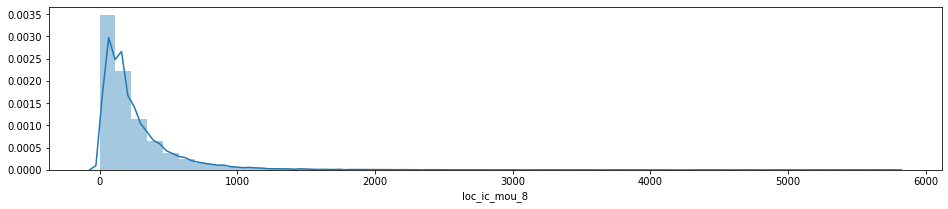

std_ic_t2t_mou_6


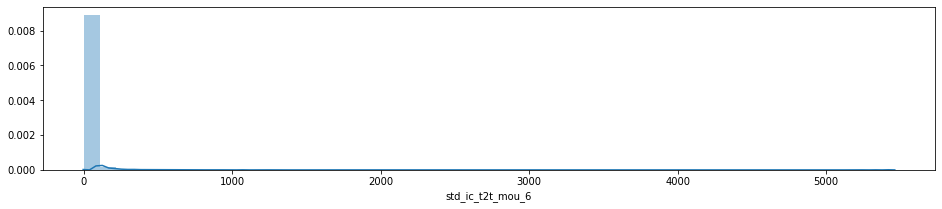

std_ic_t2t_mou_7


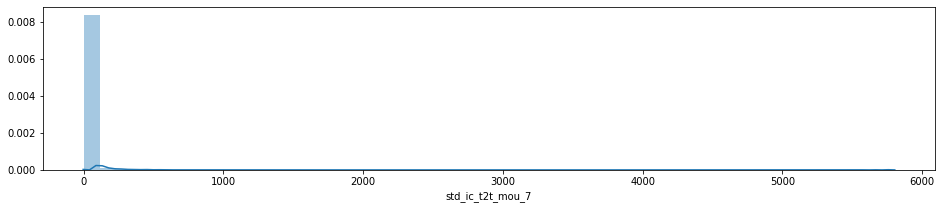

std_ic_t2t_mou_8


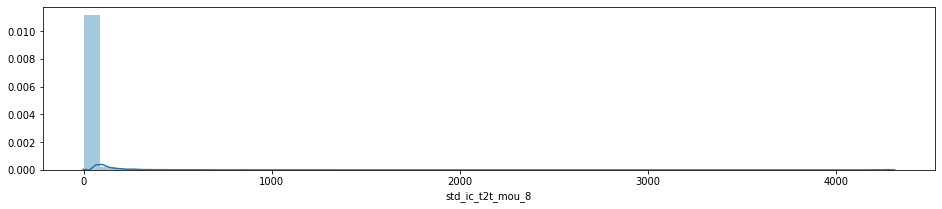

std_ic_t2m_mou_6


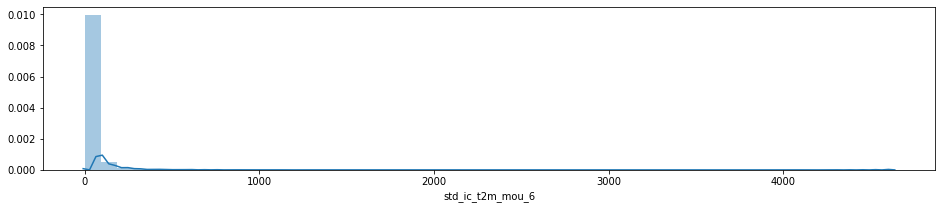

std_ic_t2m_mou_7


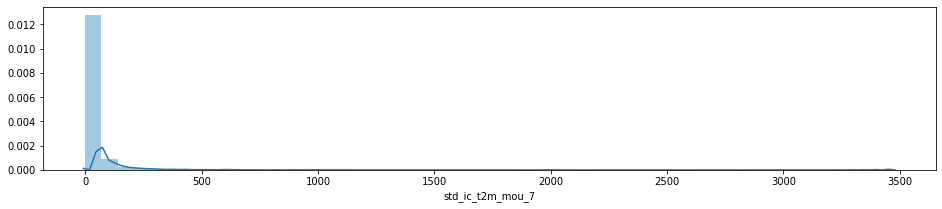

std_ic_t2m_mou_8


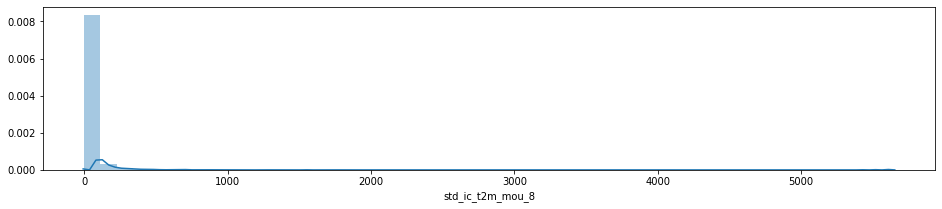

std_ic_t2f_mou_6


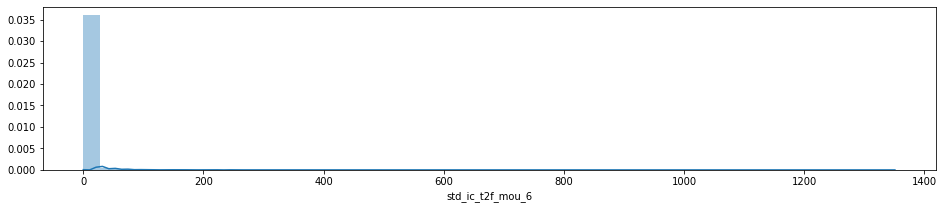

std_ic_t2f_mou_7


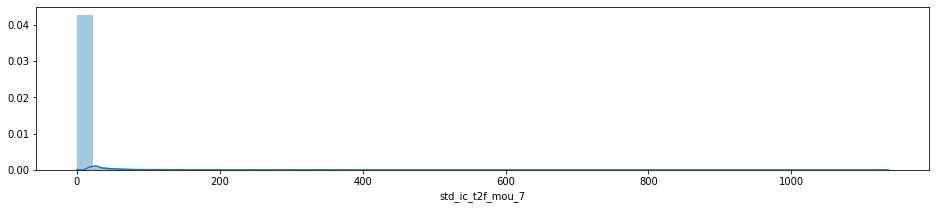

std_ic_t2f_mou_8


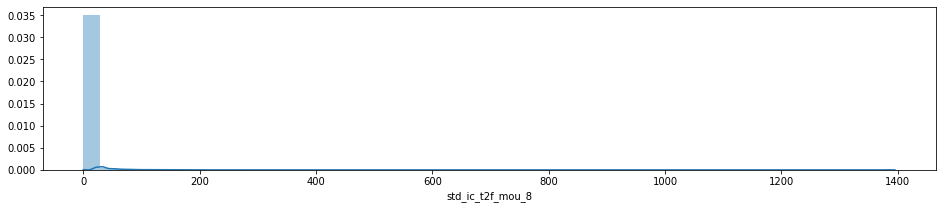

std_ic_mou_6


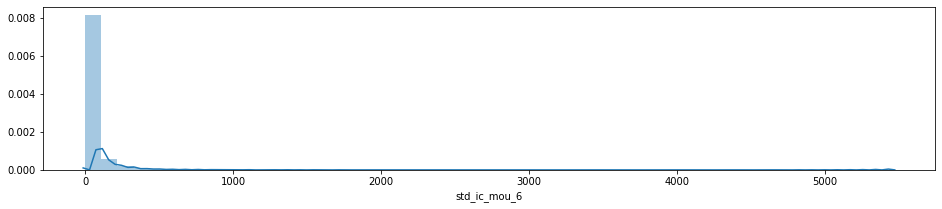

std_ic_mou_7


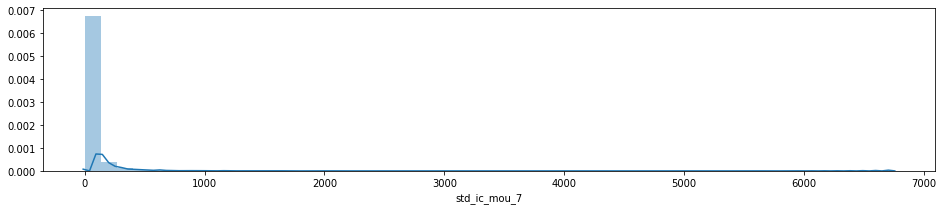

std_ic_mou_8


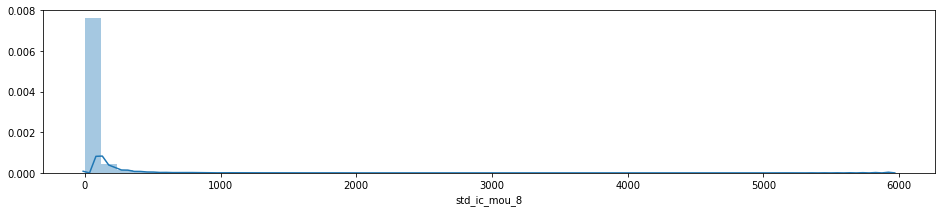

total_ic_mou_6


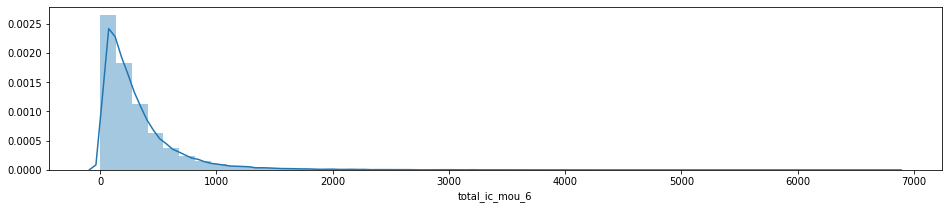

total_ic_mou_7


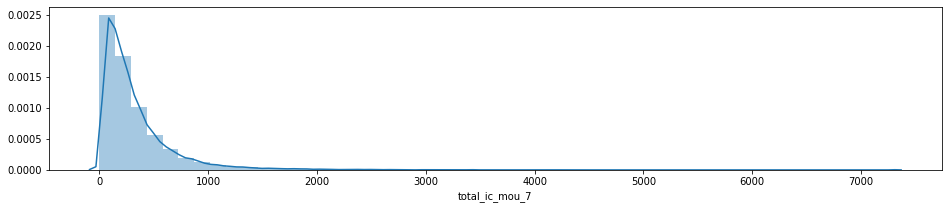

total_ic_mou_8


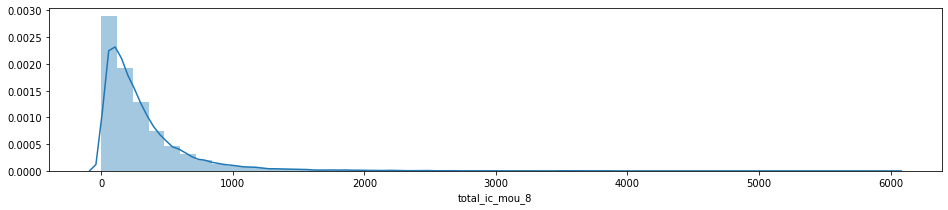

spl_ic_mou_6


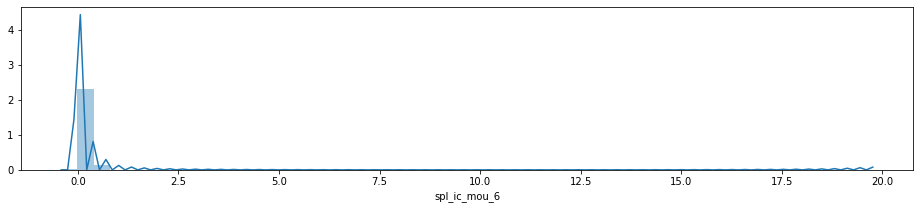

spl_ic_mou_7


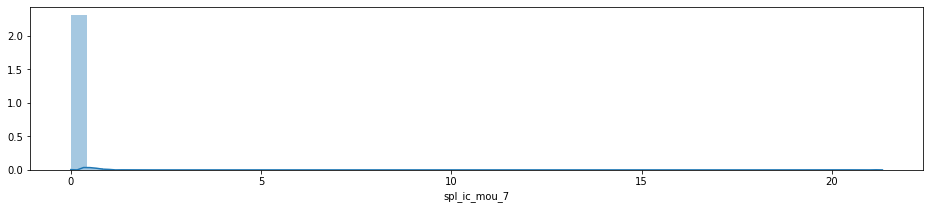

spl_ic_mou_8


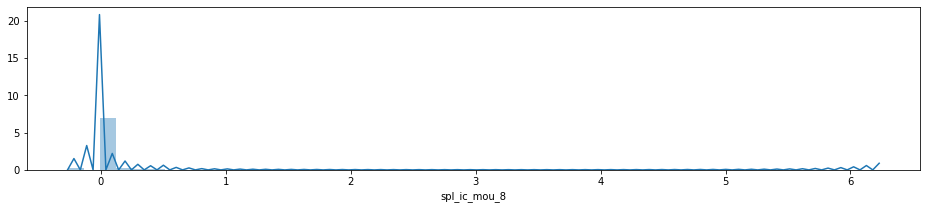

isd_ic_mou_6


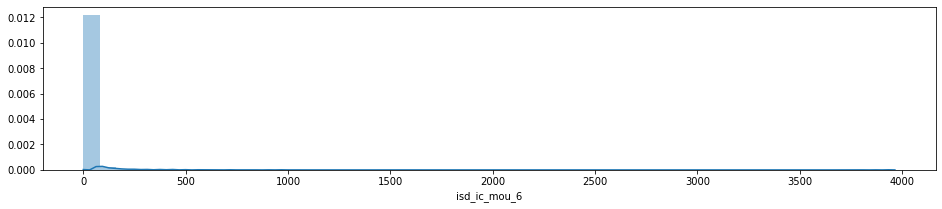

isd_ic_mou_7


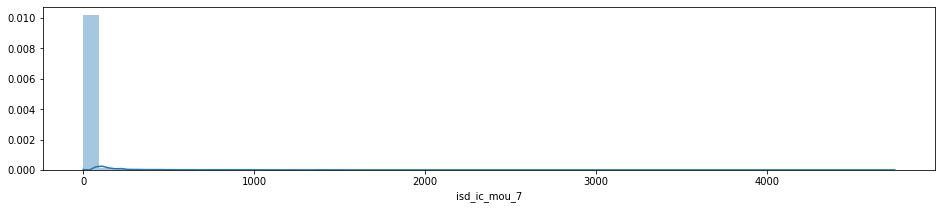

isd_ic_mou_8


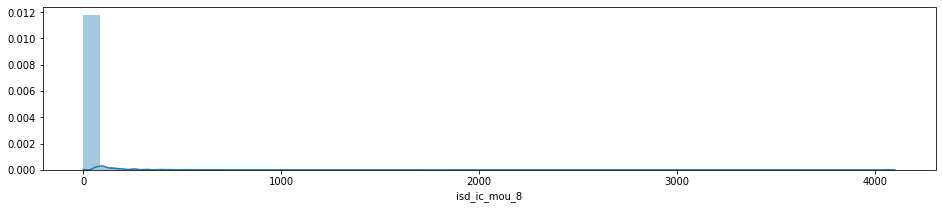

ic_others_6


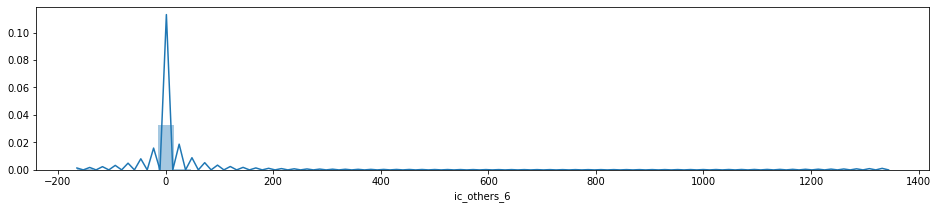

ic_others_7


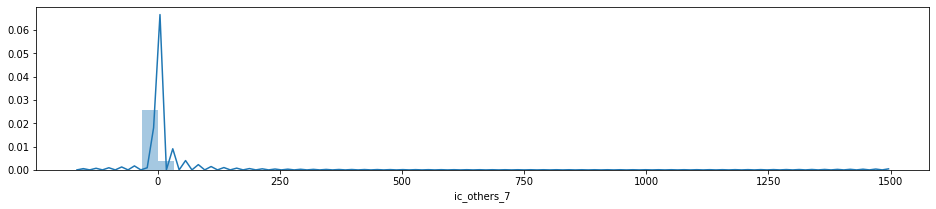

ic_others_8


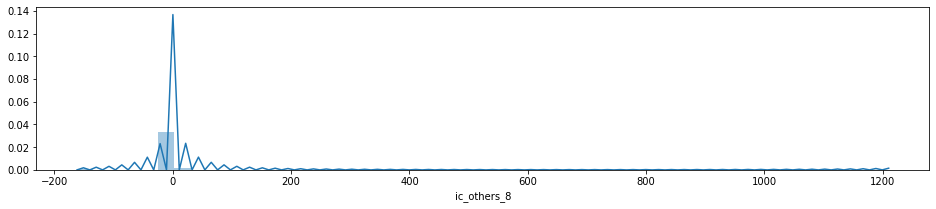

total_rech_num_6


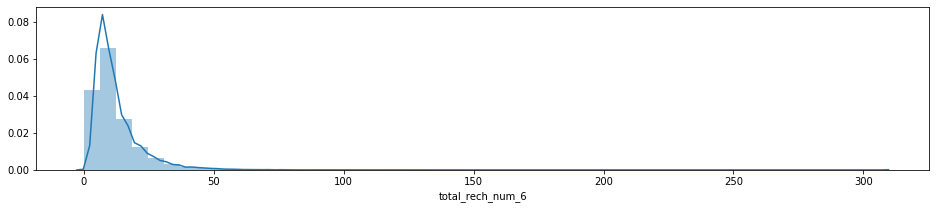

total_rech_num_7


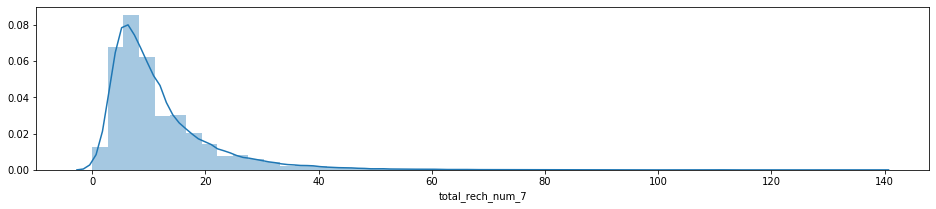

total_rech_num_8


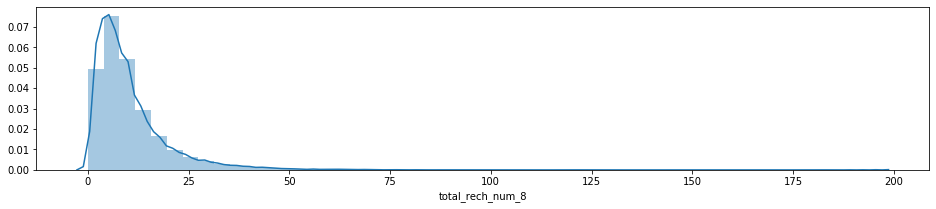

total_rech_amt_6


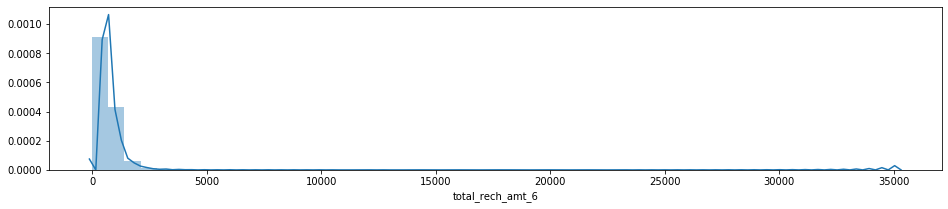

total_rech_amt_7


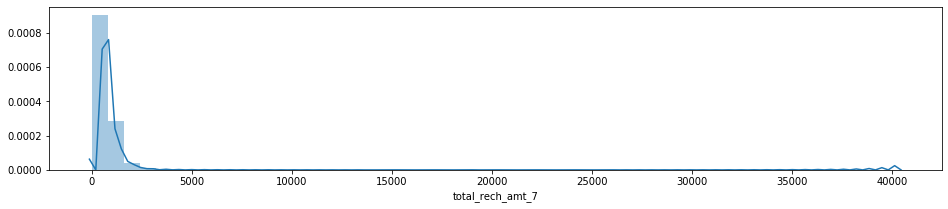

total_rech_amt_8


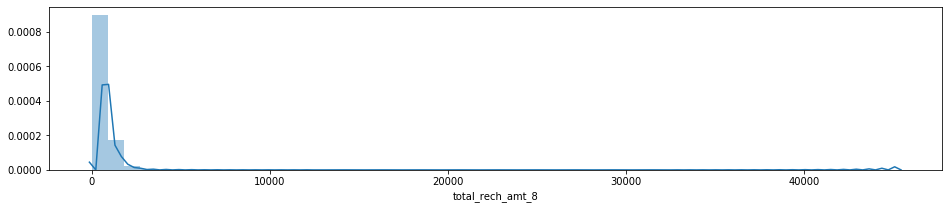

max_rech_amt_6


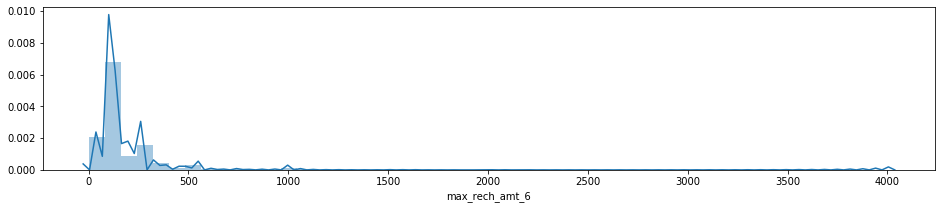

max_rech_amt_7


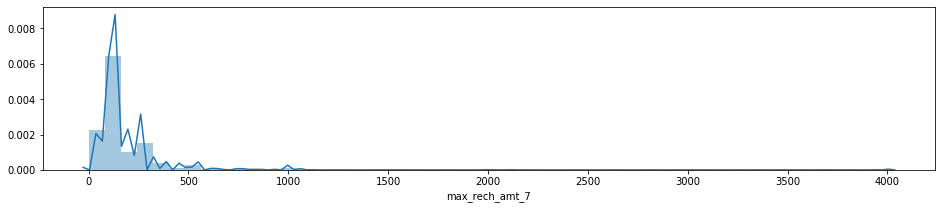

max_rech_amt_8


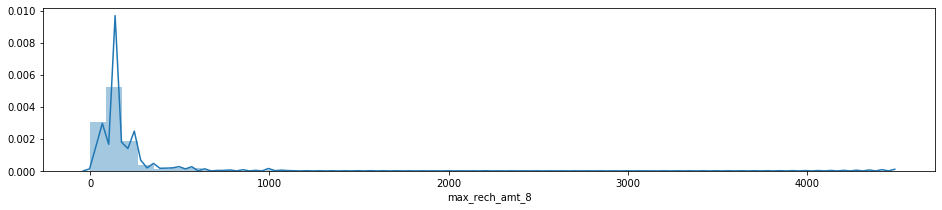

date_of_last_rech_6


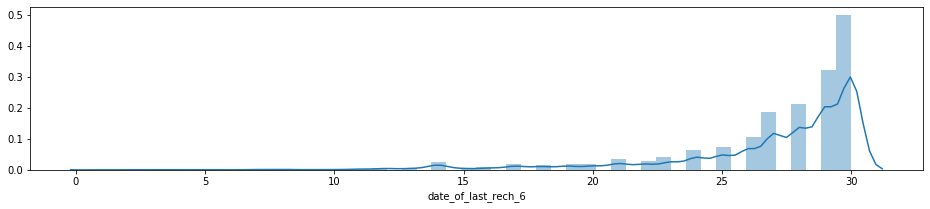

date_of_last_rech_7


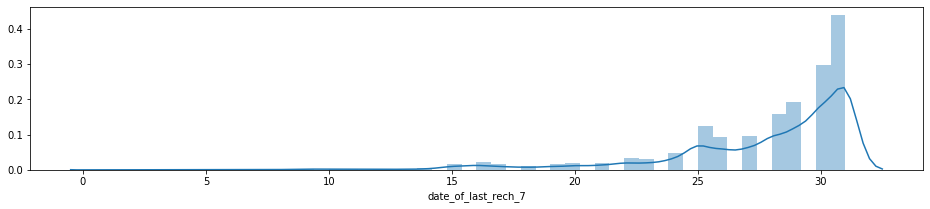

date_of_last_rech_8


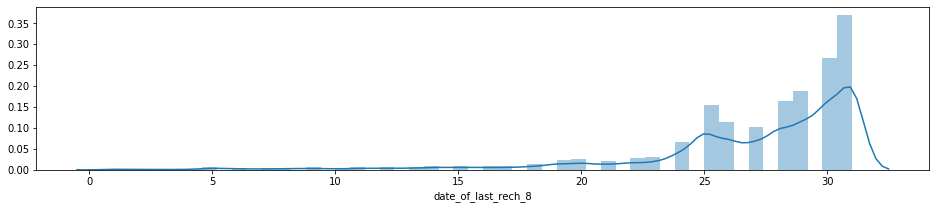

last_day_rch_amt_6


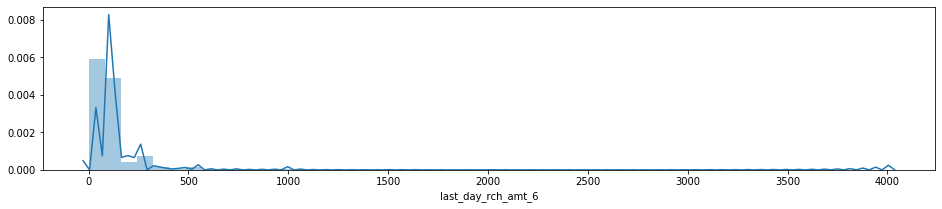

last_day_rch_amt_7


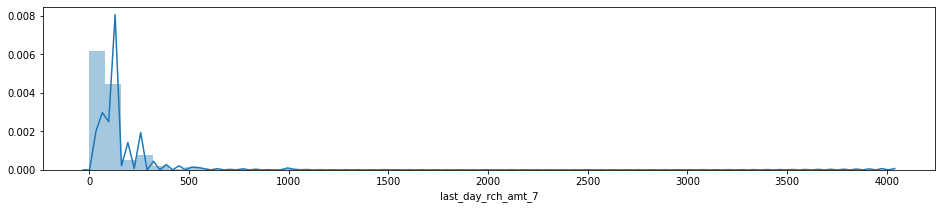

last_day_rch_amt_8


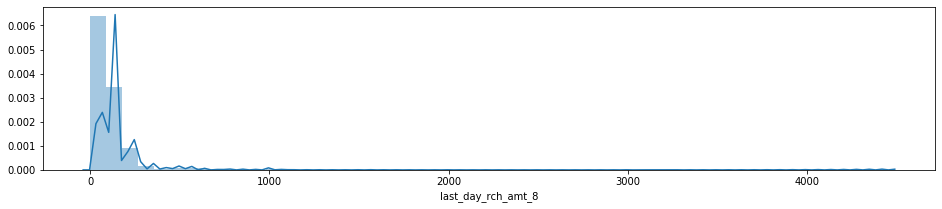

vol_2g_mb_6


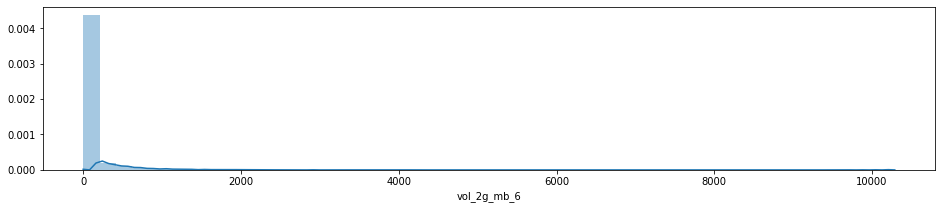

vol_2g_mb_7


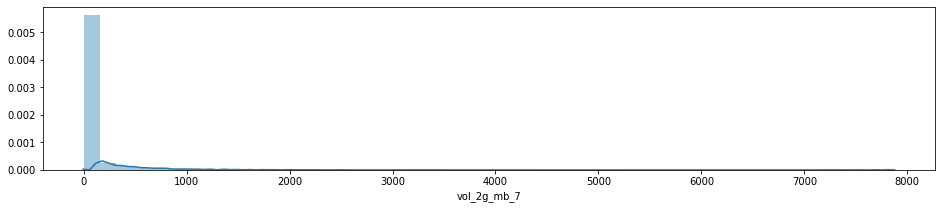

vol_2g_mb_8


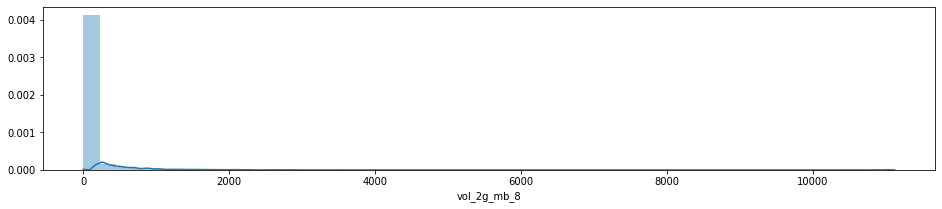

vol_3g_mb_6


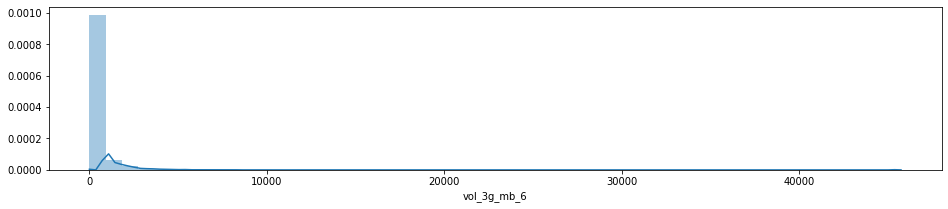

vol_3g_mb_7


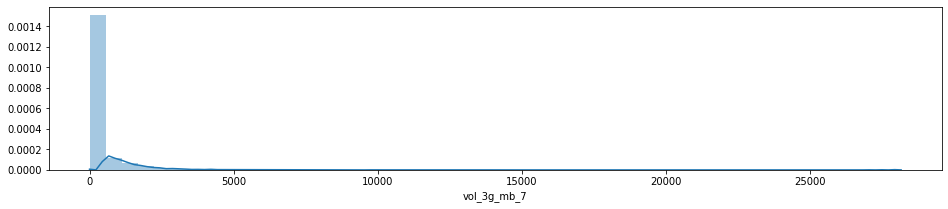

vol_3g_mb_8


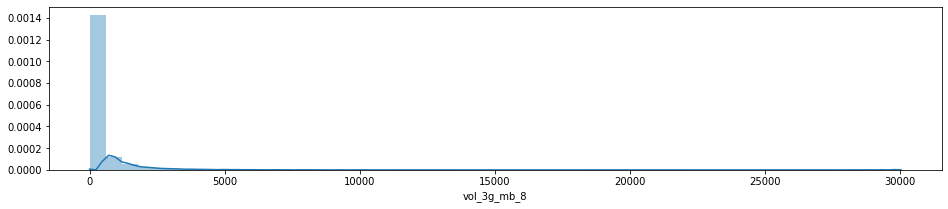

monthly_2g_6


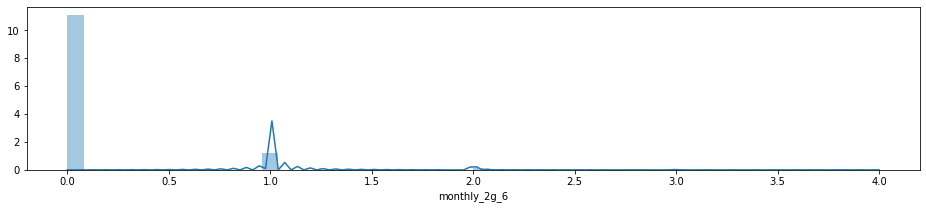

monthly_2g_7


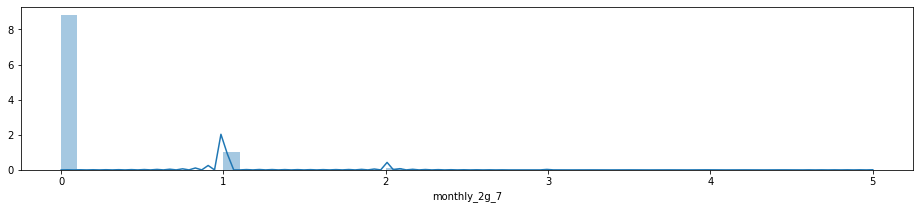

monthly_2g_8


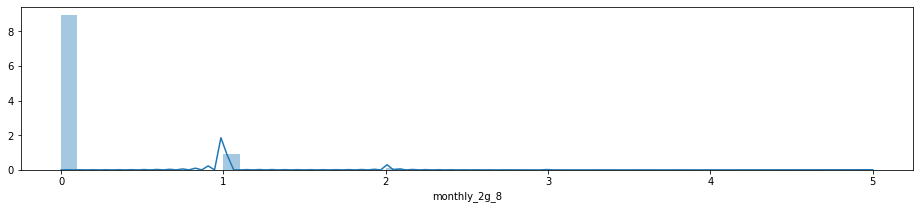

sachet_2g_6


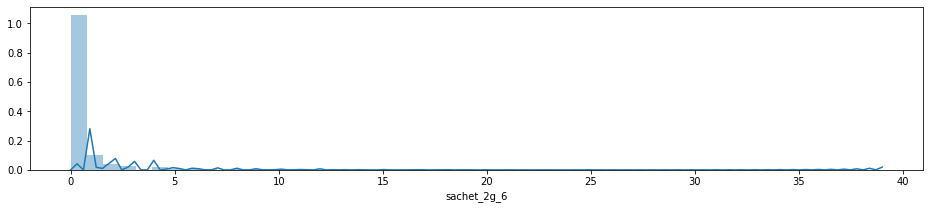

sachet_2g_7


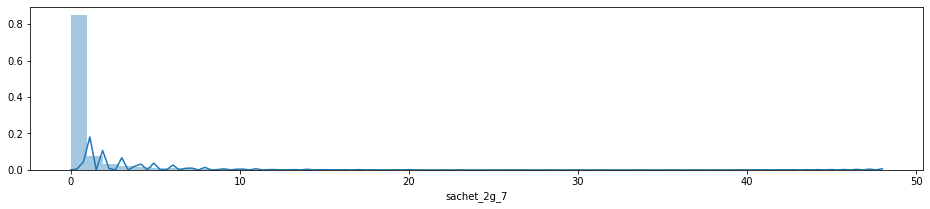

sachet_2g_8


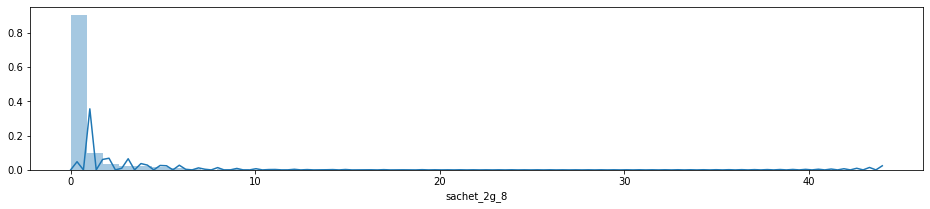

monthly_3g_6


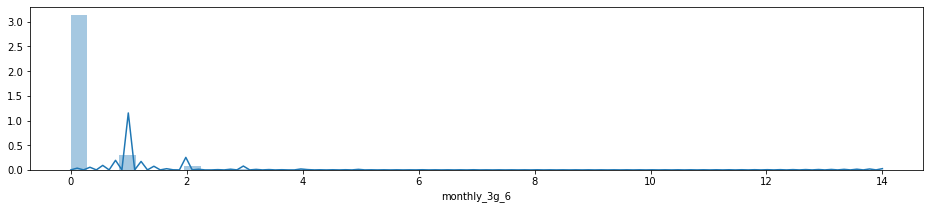

monthly_3g_7


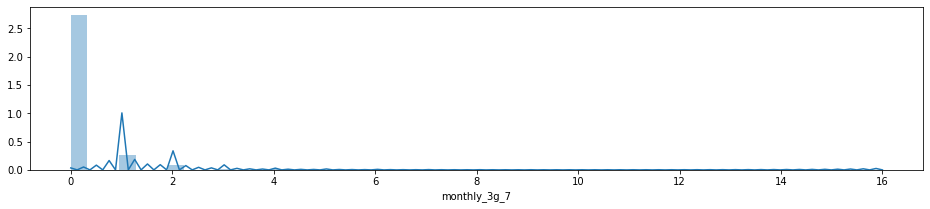

monthly_3g_8


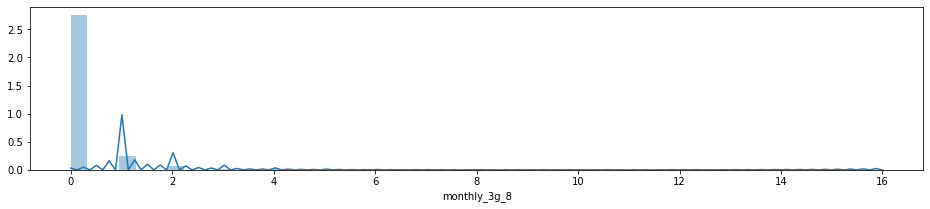

sachet_3g_6


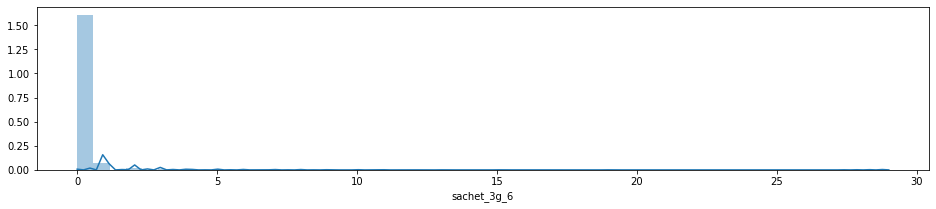

sachet_3g_7


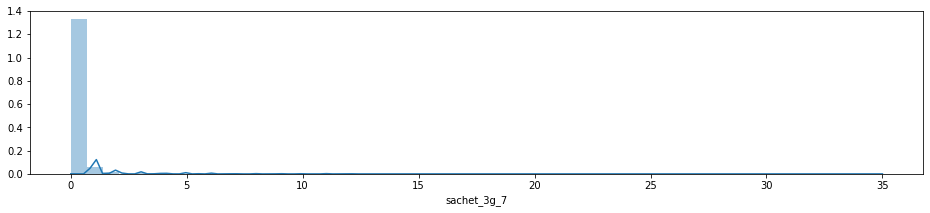

sachet_3g_8


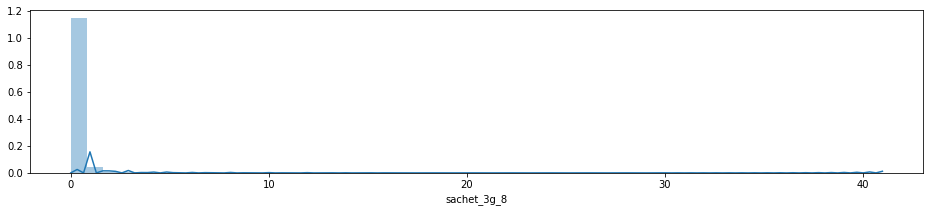

aon


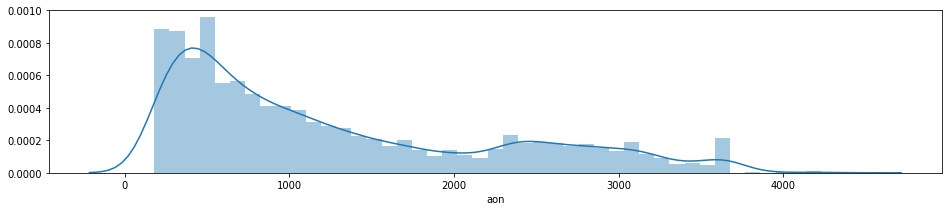

aug_vbc_3g


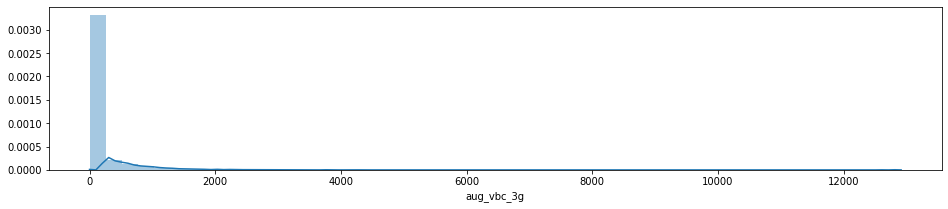

jul_vbc_3g


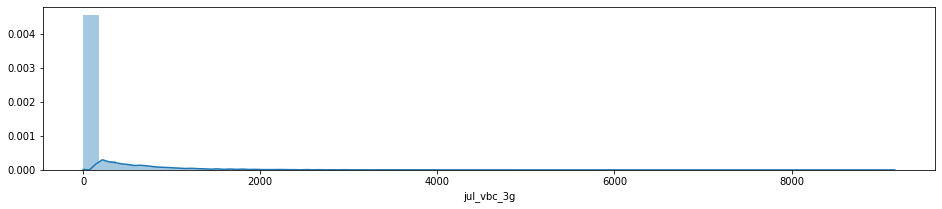

jun_vbc_3g


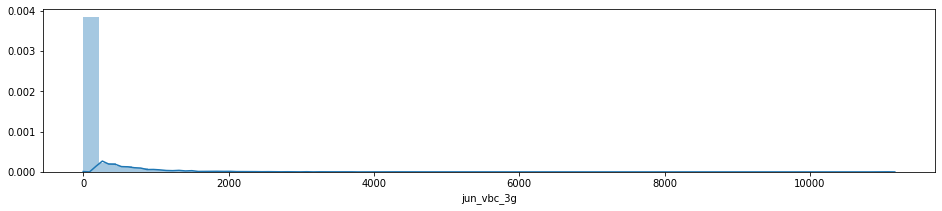

sep_vbc_3g


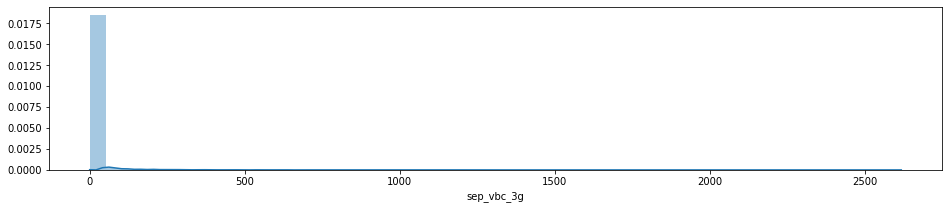

churn_data


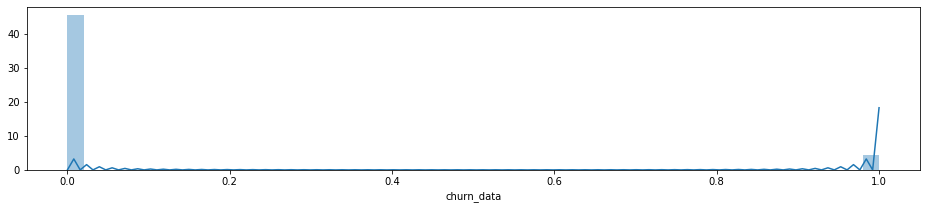

arpu_ratio


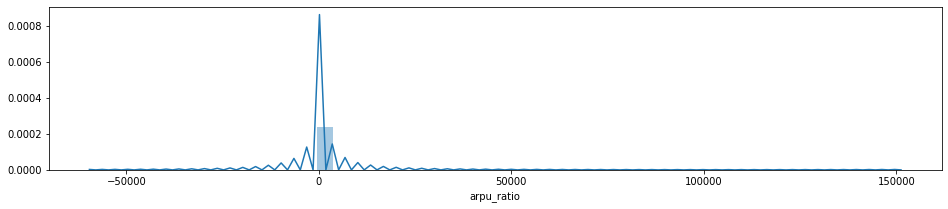

call_centre_ratio


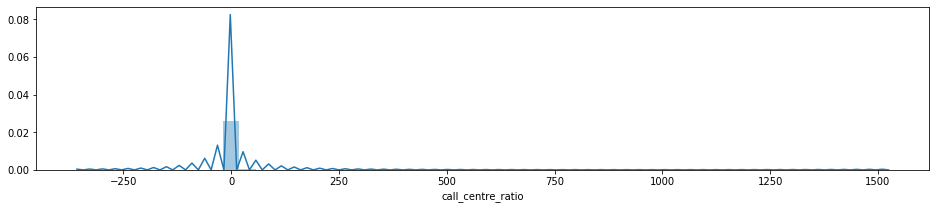

network_usage_diff


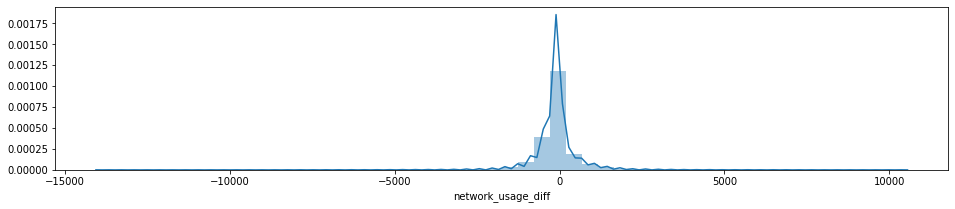

network_usage_diff_good


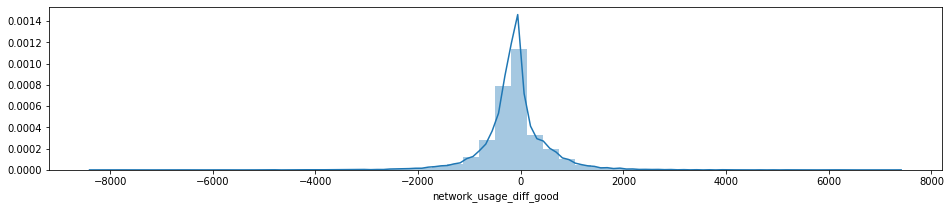

2g_usage_ratio


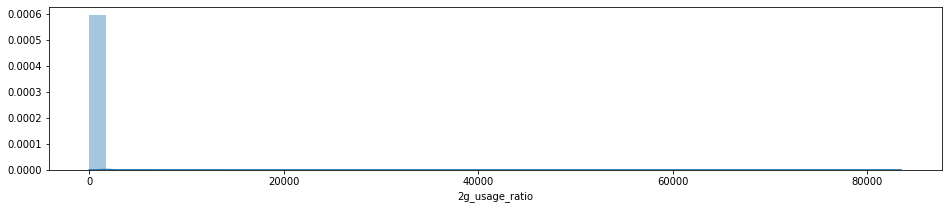

3g_usage_ratio


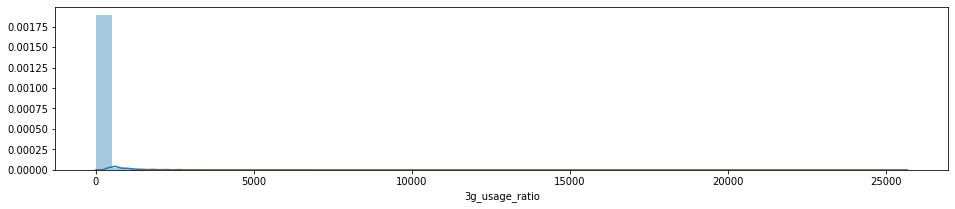

og_ratio


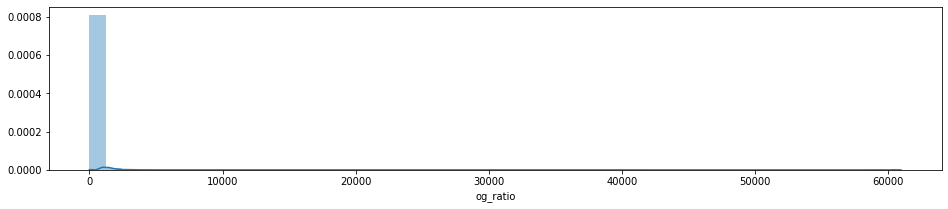

ic_ratio


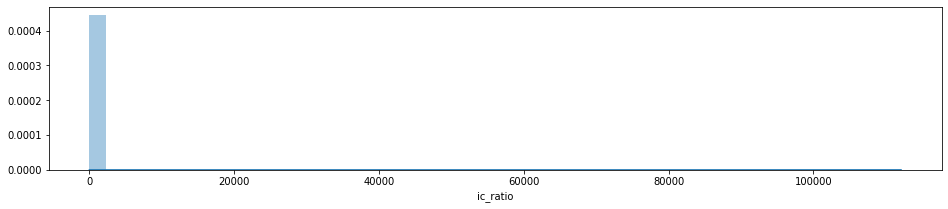

vbc_difference


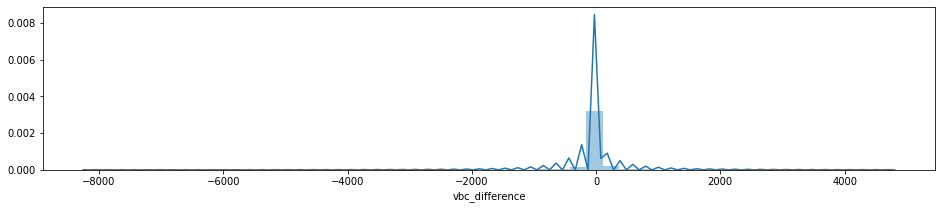

In [54]:
# Univariate analysis on all column
for columns in telecom_churn_df_high.columns:
    plt.figure(figsize=(16,3))
    column = telecom_churn_df_high[columns]
    print(columns)
    sns.distplot(column)
    plt.show()

# Bivariate analysis

In [55]:
#Older customer are more likely to continue
telecom_churn_df_high['binned_aon'] = pd.qcut(telecom_churn_df_high['aon'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_aon','churn_data']).count()/telecom_churn_df_high.groupby(['binned_aon']).count()).mobile_number),2)

(binned_aon        churn_data
 (179.999, 294.0]  0            85.000000
                   1            15.000000
 (294.0, 418.0]    0            87.000000
                   1            13.000000
 (418.0, 522.0]    0            90.000000
                   1            10.000000
 (522.0, 703.0]    0            89.000000
                   1            11.000000
 (703.0, 914.0]    0            88.000000
                   1            12.000000
 (914.0, 1183.0]   0            91.000000
                   1            9.000000 
 (1183.0, 1590.0]  0            94.000000
                   1            6.000000 
 (1590.0, 2325.0]  0            95.000000
                   1            5.000000 
 (2325.0, 2846.0]  0            96.000000
                   1            4.000000 
 (2846.0, 4321.0]  0            97.000000
                   1            3.000000 
 Name: mobile_number, dtype: float64, 2)

In [56]:
telecom_churn_df_high.drop(['binned_aon'], axis=1, inplace=True)

In [57]:
# customers having low arpu in action phase as compared to good phase is likely to churn
telecom_churn_df_high['binned_arpu_ratio'] = pd.qcut(telecom_churn_df_high['arpu_ratio'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_arpu_ratio','churn_data']).count()/telecom_churn_df_high.groupby(['binned_arpu_ratio']).count()).mobile_number),2)

(binned_arpu_ratio             churn_data
 (-59575.700999999994, 0.661]  0            95.000000
                               1            5.000000 
 (0.661, 0.79]                 0            97.000000
                               1            3.000000 
 (0.79, 0.894]                 0            97.000000
                               1            3.000000 
 (0.894, 0.991]                0            98.000000
                               1            2.000000 
 (0.991, 1.098]                0            97.000000
                               1            3.000000 
 (1.098, 1.229]                0            97.000000
                               1            3.000000 
 (1.229, 1.415]                0            96.000000
                               1            4.000000 
 (1.415, 1.786]                0            95.000000
                               1            5.000000 
 (1.786, 3.391]                0            87.000000
                               1        

In [58]:
telecom_churn_df_high.drop(['binned_arpu_ratio'], axis=1, inplace=True)

In [59]:
# customers not using outgoing calls for september are likely to churn
telecom_churn_df_high['binned_total_og_mou_8'] = pd.qcut(telecom_churn_df_high['total_og_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_total_og_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_total_og_mou_8']).count()).mobile_number),2)

(binned_total_og_mou_8  churn_data
 (-0.001, 19.41]        0            51.000000
                        1            49.000000
 (19.41, 138.06]        0            91.000000
                        1            9.000000 
 (138.06, 235.91]       0            94.000000
                        1            6.000000 
 (235.91, 331.76]       0            96.000000
                        1            4.000000 
 (331.76, 435.33]       0            96.000000
                        1            4.000000 
 (435.33, 563.51]       0            97.000000
                        1            3.000000 
 (563.51, 732.94]       0            98.000000
                        1            2.000000 
 (732.94, 960.03]       0            97.000000
                        1            3.000000 
 (960.03, 1393.51]      0            97.000000
                        1            3.000000 
 (1393.51, 14043.06]    0            97.000000
                        1            3.000000 
 Name: mobile_number, dty

In [60]:
telecom_churn_df_high.drop(['binned_total_og_mou_8'], axis=1, inplace=True)

In [61]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_arpu_8'] = pd.qcut(telecom_churn_df_high['arpu_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_arpu_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_arpu_8']).count()).mobile_number),2)

(binned_arpu_8         churn_data
 (-945.809, 134.17]    0            53.000000
                       1            47.000000
 (134.17, 252.3]       0            90.000000
                       1            10.000000
 (252.3, 324.913]      0            94.000000
                       1            6.000000 
 (324.913, 387.465]    0            96.000000
                       1            4.000000 
 (387.465, 452.091]    0            97.000000
                       1            3.000000 
 (452.091, 526.063]    0            97.000000
                       1            3.000000 
 (526.063, 614.013]    0            97.000000
                       1            3.000000 
 (614.013, 744.166]    0            97.000000
                       1            3.000000 
 (744.166, 985.202]    0            97.000000
                       1            3.000000 
 (985.202, 33543.624]  0            96.000000
                       1            4.000000 
 Name: mobile_number, dtype: float64, 2)

In [62]:
telecom_churn_df_high.drop(['binned_arpu_8'], axis=1, inplace=True)

In [63]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_onnet_mou_8'] = pd.qcut(telecom_churn_df_high['onnet_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_onnet_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_onnet_mou_8']).count()).mobile_number),2)

(binned_onnet_mou_8  churn_data
 (-0.001, 6.88]      0            82.000000
                     1            18.000000
 (6.88, 23.76]       0            91.000000
                     1            9.000000 
 (23.76, 45.44]      0            93.000000
                     1            7.000000 
 (45.44, 73.41]      0            95.000000
                     1            5.000000 
 (73.41, 113.09]     0            96.000000
                     1            4.000000 
 (113.09, 150.43]    0            72.000000
                     1            28.000000
 (150.43, 234.51]    0            96.000000
                     1            4.000000 
 (234.51, 389.31]    0            96.000000
                     1            4.000000 
 (389.31, 723.61]    0            96.000000
                     1            4.000000 
 (723.61, 10752.56]  0            97.000000
                     1            3.000000 
 Name: mobile_number, dtype: float64, 2)

In [64]:
telecom_churn_df_high.drop(['binned_onnet_mou_8'], axis=1, inplace=True)

In [65]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_offnet_mou_8'] = pd.qcut(telecom_churn_df_high['offnet_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_offnet_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_offnet_mou_8']).count()).mobile_number),2)

(binned_offnet_mou_8  churn_data
 (-0.001, 35.08]      0            78.000000
                      1            22.000000
 (35.08, 85.63]       0            91.000000
                      1            9.000000 
 (85.63, 138.88]      0            94.000000
                      1            6.000000 
 (138.88, 192.164]    0            90.000000
                      1            10.000000
 (192.164, 240.94]    0            77.000000
                      1            23.000000
 (240.94, 314.71]     0            97.000000
                      1            3.000000 
 (314.71, 415.84]     0            97.000000
                      1            3.000000 
 (415.84, 564.58]     0            97.000000
                      1            3.000000 
 (564.58, 853.79]     0            97.000000
                      1            3.000000 
 (853.79, 14007.34]   0            97.000000
                      1            3.000000 
 Name: mobile_number, dtype: float64, 2)

In [66]:
telecom_churn_df_high.drop(['binned_offnet_mou_8'], axis=1, inplace=True)

# Outlier Treatment

There must be data which are not significant in predicting the Churn customers in every column and presence of this data would give biased results. Hence we can do outlier treatement to remove such data

It is done using 3 sigma technique

In [67]:
pre_treatment = telecom_churn_df_high.index.size

In [68]:
# Remove 0.3 percent outliers from data set 
for columns in telecom_churn_df_high.columns:
    column = telecom_churn_df_high[columns]
    upper = column.mean() + 3*column.std()
    lower = column.mean() - 3*column.std()
    outliers = pd.Series([x for x in column if (x < lower) or (x > upper)])
    out_percent = (outliers.size/column.size) * 100
    if out_percent <= 0.3:
        print(out_percent)
        telecom_churn_df_high = telecom_churn_df_high[(telecom_churn_df_high[columns] >= lower) & (telecom_churn_df_high[columns] <= upper)]
    

0.0
0.09329912365465996
0.2001133975919688
0.13367643618621128
0.033463842318375


In [69]:
telecom_churn_df_high.shape

(29873, 139)

In [70]:
# % data retained after treatment
(telecom_churn_df_high.index.size/pre_treatment) *100

99.5401686048449

### Standardizing data

- Converting data set into dependant and independant variables for building the models

In [71]:
X = telecom_churn_df_high.drop(['churn_data','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_churn_df_high['churn_data']

y.head()

7     1
13    0
16    0
17    0
21    0
Name: churn_data, dtype: int64

### Splitting test/train data:
- We need to split the data into training and testing set. Models would be run on Training set and validated on testing data set later

In [72]:
columns_name = X.columns
[print(x) for x in columns_name]

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [73]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100) 

### Scaling

In [74]:
scaler = PowerTransformer(method='yeo-johnson')
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 0.273327  -0.316710 1.160396  -0.896325    -0.977318    -1.500140      
1 0.499219  -0.156527 0.102318  0.340729     0.885731     0.476187       
2 1.475917  0.951210  1.146778  2.306024     2.058901     2.245964       
3 -0.857476 -0.387482 -0.526732 -1.621421    0.055301     -0.059158      
4 -0.649216 -0.559882 0.093763  -0.523478    -0.314339    -0.778491      

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0 -0.043773     -0.781272     -0.183310     -0.270836      1.062719         
1 -1.572710     -1.687693     -0.972634     0.353108       -0.191929        
2 -0.808798     -0.854322     -0.548498     -0.270836      -0.191929        
3 0.136911      0.547314      0.333161      -0.012292      -0.191929        
4 -0.604653     -0.403190     -0.138343     -0.270836      -0.191929        

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0 0.038412       -0.331773      1.922503       1.176690         
1 -0.206335      0.394836       -0.310686      -0.340466        
2 -0.206335      -0.331773      -0.310686      -0.340466        
3 -0.206335      0.814790       -0.310686      -0.340466        
4 -0.206335      -0.331773      -0.310686      -0.340466        

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0 -1.446958         -1.905946         -1.309521         -0.751508           
1 -1.418627         -1.057561         -1.467732         -1.205011           
2 0.762008          0.178643          0.266944          -0.553981           
3 -0.937096         0.914360          0.616875          -1.330398           
4 0.362103          0.575164          -0.038967         0.274402            

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0 -2.144232         -0.831817         0.056019          -0.943145           
1 -1.316596         -1.441419         -0.359266         -0.107566           
2 -0.312091         -0.223215         0.491579          -0.135067           
3 -0.719694         -0.241356         -0.680562         -0.943145           
4 0.448152          0.589094          -0.276377         -0.163575           

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0 -0.935185         -0.555551         1.167344          0.774593            
1 -0.935185         -0.555551         -0.345984         1.238331            
2 -0.603790         -0.555551         -0.345984         -0.274393           
3 0.145402          -0.555551         1.432326          2.641013            
4 0.749216          -0.148492         -0.345984         -0.274393           

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0 -0.980577     -2.253284     -1.030843     0.273092            
1 -1.361648     -1.369976     -1.544252     0.980152            
2 -0.052510     -0.304860     -0.198533     1.699856            
3 -1.348999     0.007144      -0.020023     -1.130679           
4 0.161632      0.361926      0.330807      -1.130679           

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0 -1.131908         -0.660808         0.886516          -1.384434           
1 1.223856          1.088121          -0.259423         -0.278138           
2 1.631773          1.689958          0.300401          0.059476            
3 -0.060203         0.291279          0.944381          1.154645            
4 -1.131908         -1.091075         -1.400183         -1.384434           

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0 0.673117          -0.451707         -0.445457         -0.463034           
1 0.276058          -0.451707         -0.445457         2.246609            
2 0.355470          -0.451707         -0.445457         -0.463034           
3 1.025047          -0.451707         -0.445457         -0.463034           
4 -1.332803         -0.451707         1.900818          -0.463034           



In [75]:
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.716887 -0.225257 -0.365660 -1.579079    -1.429419    -1.055884      
1 -1.451526 0.203308  -0.646273 -2.321477    -0.558885    -1.775094      
2 1.523981  0.914511  -0.107028 -0.521063    -0.217613    -0.499388      
3 0.002631  0.050917  0.480806  -0.142663    -0.312256    -0.315489      
4 4.549299  1.043746  1.689525  2.226178     1.909901     1.987857       

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0 -1.406070     -1.868883     -0.903283     0.709524       -0.189799        
1 -2.411992     1.013498      -0.327547     -0.392933      0.080868         
2 0.347810      -0.300656     -0.890402     -0.392933      -0.189799        
3 1.250298      0.862089      1.454182      -0.392933      -0.189799        
4 1.154175      -0.135108     0.115148      -0.392933      -0.189799        

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0 -0.349241      1.744540       -0.505269      -0.544571        
1 0.677240       -0.563256      2.035446       1.947386         
2 -0.349241      -0.563256      -0.505269      -0.544571        
3 -0.349241      -0.563256      -0.505269      -0.544571        
4 -0.349241      -0.563256      -0.505269      -0.544571        

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0 -1.012242         -0.930157         -0.373377         -0.934033           
1 -1.894689         -1.930248         -1.772214         -2.045466           
2 -0.838519         -0.357407         -0.325308         0.859671            
3 -0.807796         -0.904578         -0.672613         -0.488122           
4 0.185776          0.217216          0.202169          0.846167            

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0 -1.396390         -0.513331         -0.938327         -0.943179           
1 1.273843          -0.998200         -0.938327         -0.943179           
2 0.077291          -0.328278         -0.165413         0.648788            
3 -0.247197         -0.275031         -0.938327         -0.943179           
4 -0.055519         -0.099730         1.531513          1.297868            

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0 -0.944209         -0.545646         -0.382445         -0.258057           
1 -0.944209         -0.545646         -0.382445         2.137724            
2 -0.094530         -0.545646         -0.382445         -0.258057           
3 -0.944209         -0.545646         -0.382445         -0.258057           
4 1.662384          -0.545646         -0.382445         -0.258057           

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0 -1.096466     -1.403445     -0.620682     -1.134289           
1 -2.150146     0.836114      -1.209743     -1.134289           
2 0.483028      -0.165887     -0.467461     0.511896            
3 -0.708821     -0.526009     -0.497974     0.750385            
4 0.622488      -0.075621     0.048796      1.690825            

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0 -0.527530         -1.088545         -0.441723         -0.486827           
1 0.509888          -1.088545         -0.812827         0.931117            
2 0.642348          0.429469          -1.400753         -0.458505           
3 0.631502          0.649640          1.481085          1.279086            
4 1.588768          1.623765          1.253073          0.642695            

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0 0.056240          -0.456982         1.809520          -0.472634           
1 0.024529          -0.456982         -0.451722         -0.472634           
2 -1.206770         -0.456982         -0.451722         -0.472634           
3 1.568353          -0.456982         -0.451722         -0.472634           
4 0.811706          -0.456982         -0.451722         -0.472634           



In [76]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

### Using LassoCV to get the best indicators of churn

In [77]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000481
Best score using built-in LassoCV: 0.362679


In [78]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 108 variables and eliminated the other 29 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

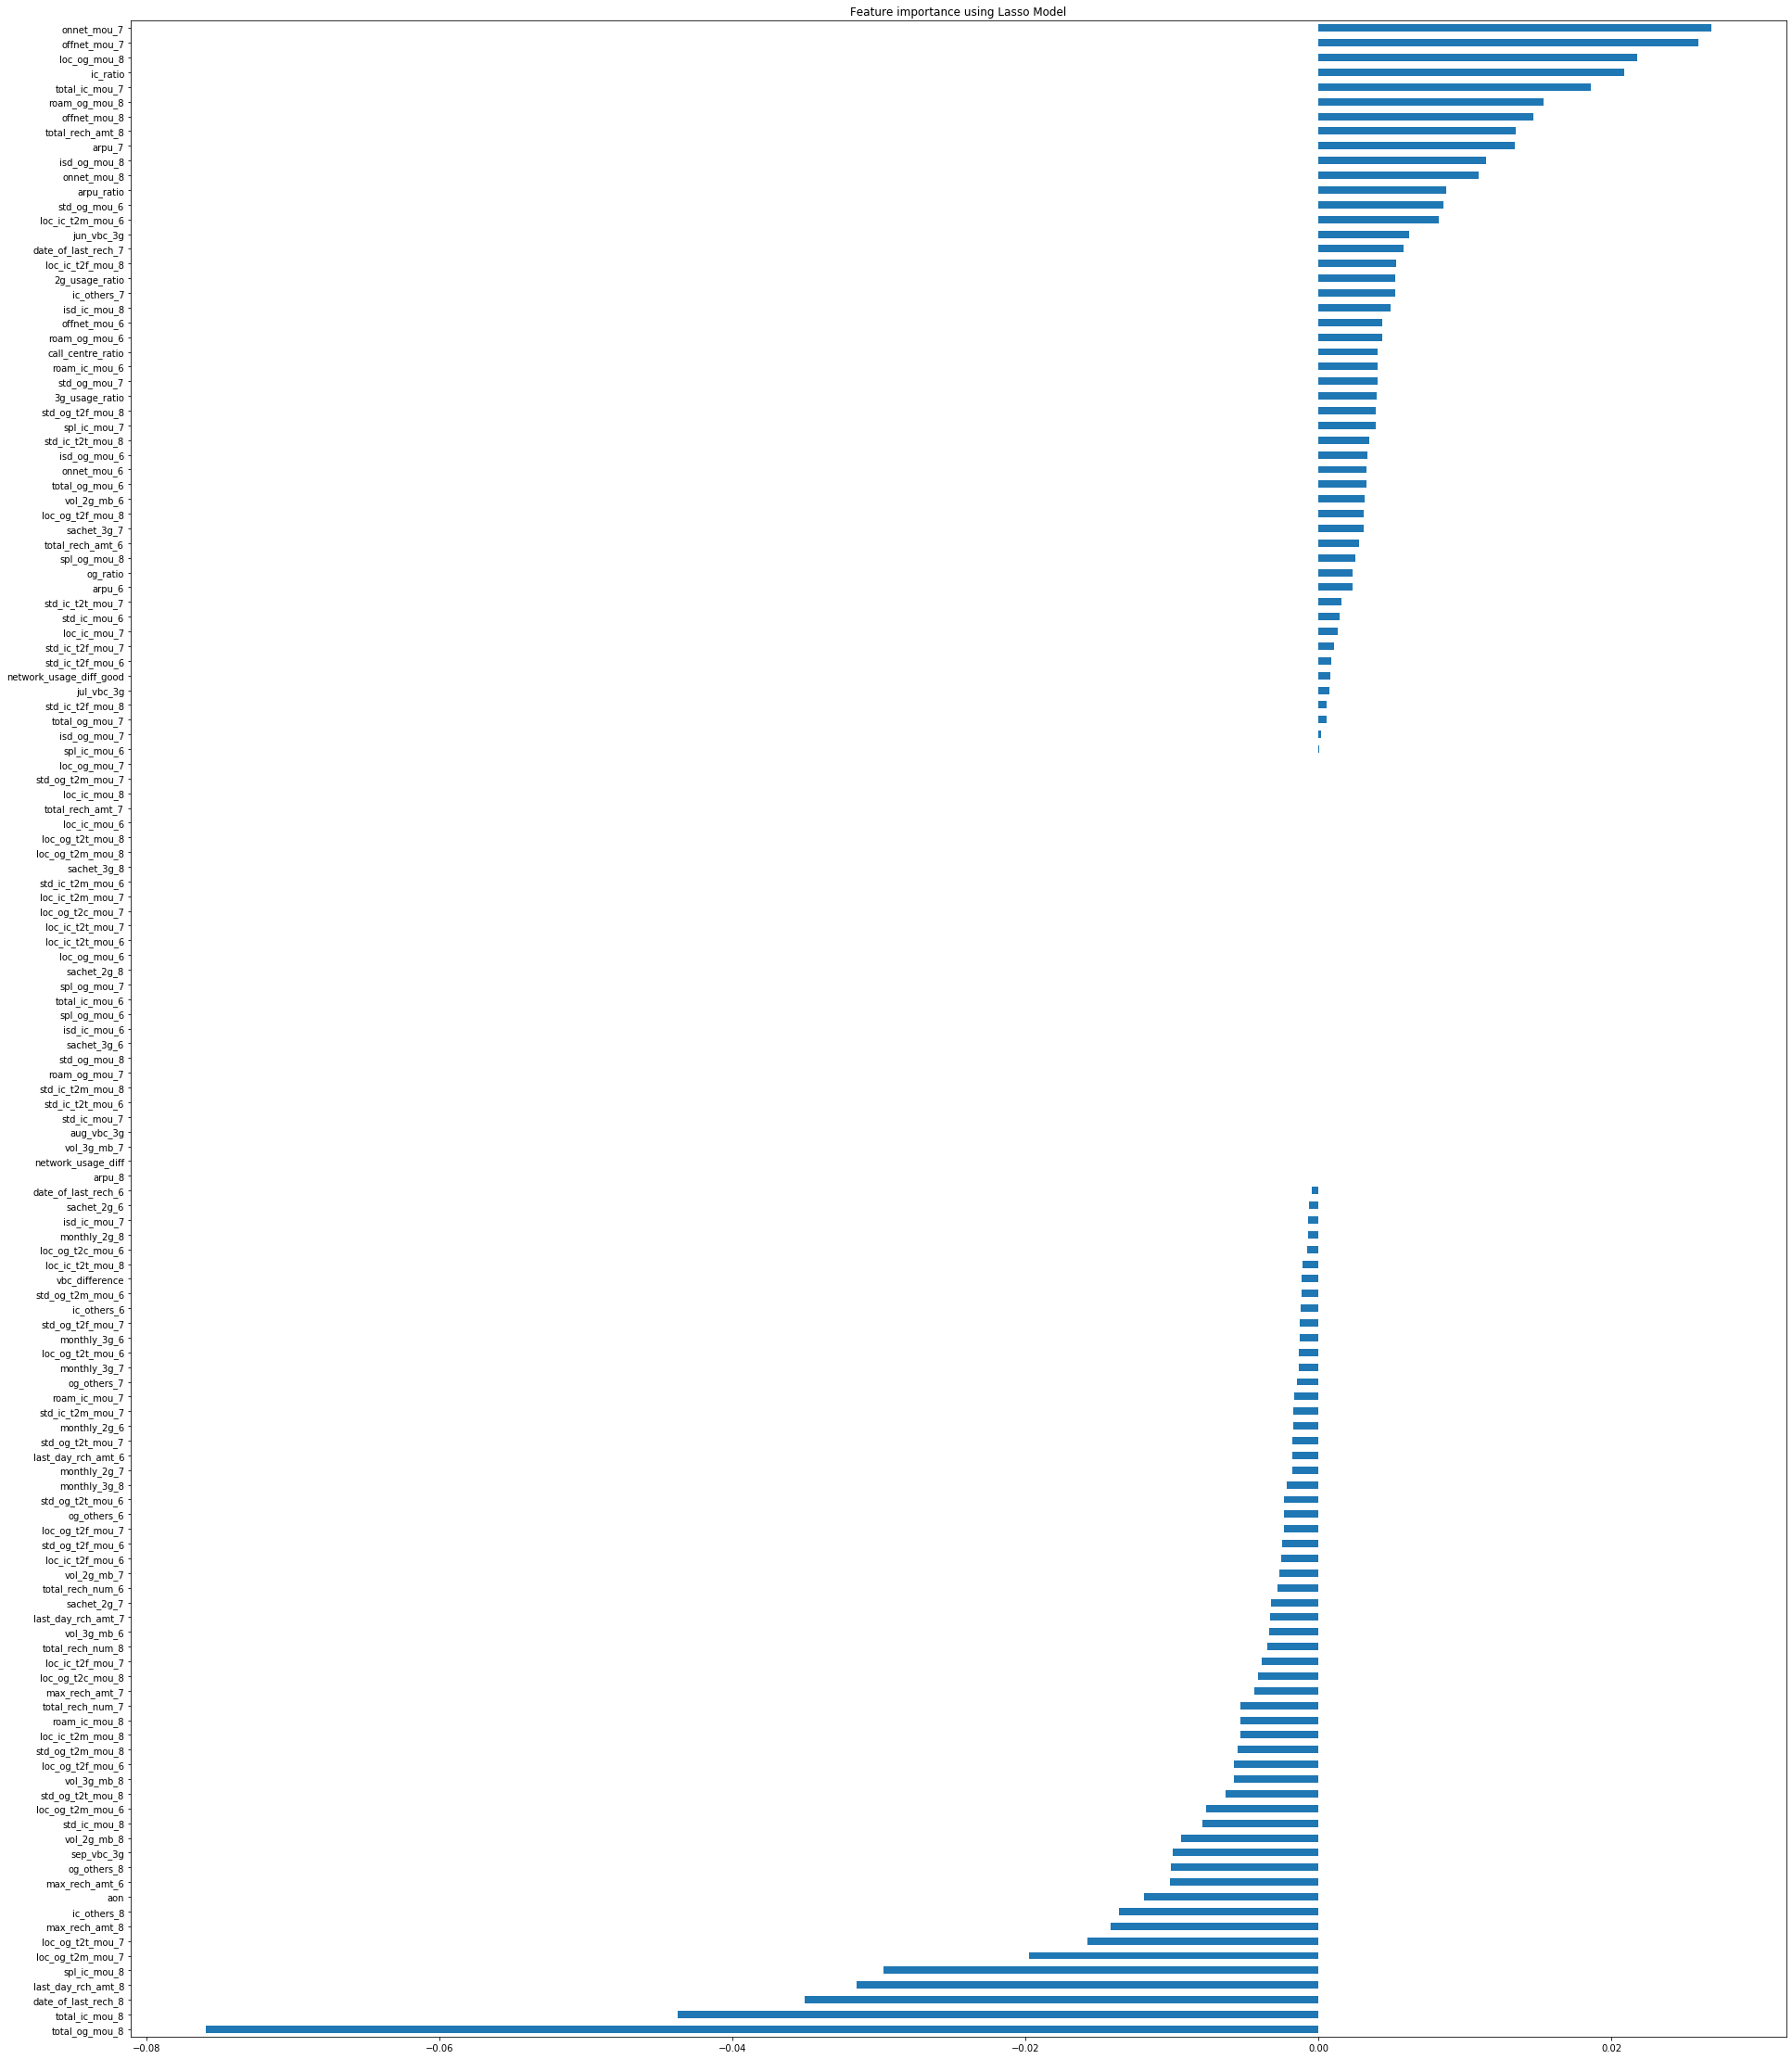

In [79]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (32, 40)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [80]:
# The best indicators of churn in reverse order are:
imp_coef.tail(10)

isd_og_mou_8       0.011469
arpu_7             0.013415
total_rech_amt_8   0.013463
offnet_mou_8       0.014684
roam_og_mou_8      0.015403
total_ic_mou_7     0.018609
ic_ratio           0.020878
loc_og_mou_8       0.021780
offnet_mou_7       0.025960
onnet_mou_7        0.026802
dtype: float64

In [81]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Logistic regression model, first training model
logm1 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20911
Model:                            GLM   Df Residuals:                    20773
Model Family:                Binomial   Df Model:                          137
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3202.4
Date:                Thu, 23 Jan 2020   Deviance:                       6404.9
Time:                        23:57:46   Pearson chi2:                 2.24e+15
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.0701      0.070    -57.907      0.000      -4.208      -3.932
arpu_6                     -0.0557      0.076     -0.733      0.464      -0.205       0.093
arpu_7                      0.0823      0.066      1.245      0.213      -0.047       0.212
arpu_8                     -0.0258      0.085     -0.305      0.761      -0.192       0.140
onnet_mou_6                 0.1509      0.103      1.460      0.144      -0.052       0.354
onnet_mou_7                 0.3321      0.102      3.246      0.001       0.132       0.533
onnet_mou_8                -0.3811      0.111     -3.447      0.001      -0.598      -0.164
offnet_mou_6                0.0321      0.112      0.286      0.775      -0.188       0.252
offnet_mou_7                0.2699      0.103      2.612      0.009       0.067       0.472
offnet_mou_8               -0.0862      0.128     -0.671      0.502      -0.338       0.166
roam_ic_mou_6               0.0533      0.056      0.944      0.345      -0.057       0.164
roam_ic_mou_7              -0.0028      0.031     -0.088      0.930      -0.064       0.059
roam_ic_mou_8              -0.0552      0.047     -1.180      0.238      -0.147       0.037
roam_og_mou_6              -0.0003      0.035     -0.007      0.994      -0.069       0.069
roam_og_mou_7              -0.0598      0.035     -1.727      0.084      -0.128       0.008
roam_og_mou_8               0.4283      0.063      6.809      0.000       0.305       0.552
loc_og_t2t_mou_6           -0.0308      0.123     -0.251      0.802      -0.272       0.210
loc_og_t2t_mou_7           -0.1224      0.124     -0.985      0.324      -0.366       0.121
loc_og_t2t_mou_8            0.3359      0.149      2.261      0.024       0.045       0.627
loc_og_t2m_mou_6           -0.2065      0.193     -1.068      0.286      -0.586       0.173
loc_og_t2m_mou_7           -0.1590      0.207     -0.767      0.443      -0.566       0.248
loc_og_t2m_mou_8            0.4297      0.252      1.705      0.088      -0.064       0.924
loc_og_t2f_mou_6           -0.1102      0.060     -1.838      0.066      -0.228       0.007
loc_og_t2f_mou_7            0.0265      0.063      0.420      0.674      -0.097       0.150
loc_og_t2f_mou_8           -0.0699      0.071     -0.986      0.324      -0.209       0.069
loc_og_t2c_mou_6           -0.0694      0.043     -1.607      0.108      -0.154       0.015
loc_og_t2c_mou_7           -0.0085      0.030     -0.282      0.778      -0.068       0.051
loc_og_t2c_mou_8            0.0264      0.036      0.730      0.465      -0.044       0.097
loc_og_mou_6                0.1276      0.258      0.495      0.621      -0.378       0.633
loc_og_mou_7               -0.1470      0.275     -0.535      0.593      -0.685       0.391
loc_og_mou_8               -0.3067      0.344  

### RFE

In [83]:
logreg = LogisticRegression()

In [84]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True,

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 64),
 ('arpu_7', False, 53),
 ('arpu_8', False, 98),
 ('onnet_mou_6', False, 38),
 ('onnet_mou_7', False, 17),
 ('onnet_mou_8', False, 16),
 ('offnet_mou_6', False, 90),
 ('offnet_mou_7', False, 4),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_6', False, 55),
 ('roam_ic_mou_7', False, 118),
 ('roam_ic_mou_8', False, 56),
 ('roam_og_mou_6', False, 121),
 ('roam_og_mou_7', False, 54),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 108),
 ('loc_og_t2t_mou_7', False, 42),
 ('loc_og_t2t_mou_8', False, 9),
 ('loc_og_t2m_mou_6', False, 22),
 ('loc_og_t2m_mou_7', False, 41),
 ('loc_og_t2m_mou_8', False, 7),
 ('loc_og_t2f_mou_6', False, 27),
 ('loc_og_t2f_mou_7', False, 105),
 ('loc_og_t2f_mou_8', False, 69),
 ('loc_og_t2c_mou_6', False, 74),
 ('loc_og_t2c_mou_7', False, 113),
 ('loc_og_t2c_mou_8', False, 106),
 ('loc_og_mou_6', False, 89),
 ('loc_og_mou_7', False, 6),
 ('loc_og_mou_8', False, 8),
 ('std_og_t2t_mou_6', False, 29),
 ('std_og_t2t_mou_7', False, 57),
 

In [87]:
col = X_train.columns[rfe.support_]
col

Index(['roam_og_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'monthly_3g_8', 'aon', 'sep_vbc_3g'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'jun_vbc_3g', 'arpu_ratio', 'call_centre_ratio', 'network_usage_diff',
       'network_usage_diff_good', '2g_usage_ratio', '3g_usage_ratio',
       'og_ratio', 'ic_ratio', 'vbc_difference'],
      dtype='object', length=122)

### Model Assessment with stats model

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20911
Model:                            GLM   Df Residuals:                    20895
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3364.1
Date:                Thu, 23 Jan 2020   Deviance:                       6728.1
Time:                        23:59:13   Pearson chi2:                 4.65e+12
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9199      0.064    -61.011      0.000      -4.046      -3.794
roam_og_mou_8           0.3527      0.035     10.121      0.000       0.284       0.421
std_og_mou_8            0.1720      0.066      2.595      0.009       0.042       0.302
total_og_mou_8         -0.3386      0.077     -4.373      0.000      -0.490      -0.187
loc_ic_t2m_mou_8       -0.4324      0.073     -5.944      0.000      -0.575      -0.290
total_ic_mou_7          0.3998      0.045      8.911      0.000       0.312       0.488
total_ic_mou_8         -0.7027      0.091     -7.714      0.000      -0.881      -0.524
spl_ic_mou_8           -0.5304      0.054     -9.864      0.000      -0.636      -0.425
total_rech_num_8        0.2780      0.047      5.907      0.000       0.186       0.370
date_of_last_rech_8    -0.6977      0.040    -17.460      0.000      -0.776      -0.619
last_day_rch_amt_8     -0.5579      0.037    -14.997      0.000      -0.631      -0.485
vol_2g_mb_8            -0.2603      0.059     -4.404      0.000      -0.376      -0.144
monthly_2g_8           -0.2336      0.070     -3.348      0.001      -0.370      -0.097
monthly_3g_8           -0.3306      0.060     -5.484      0.000      -0.449      -0.212
aon                    -0.2531      0.037     -6.882      0.000      -0.325      -0.181
sep_vbc_3g             -0.7257      0.105     -6.916      0.000      -0.931      -0.520
=======================================================================================
"""

### Adding the probablity column

Now we add the probablity column as well as the prediction column in order to make our predictions.

In [90]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.005861
1   0.055881
2   0.013160
3   0.067586
4   0.014843
5   0.002326
6   0.000167
7   0.171293
8   0.010066
9   0.208204
dtype: float64

In [91]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})

In [92]:
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.005861   
1  0       0.055881   
2  0       0.013160   
3  0       0.067586   
4  0       0.014843

In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.035 else 0)

y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.005861     0        
1  0       0.055881     1        
2  0       0.013160     0        
3  0       0.067586     1        
4  0       0.014843     0

## Confusion Metrics

In [94]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [95]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[13621  5527]
 [  134  1629]]


In [96]:
#overall accuracy check
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.7292812395389986


## VIFs

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
5   total_ic_mou_8      6.240000
2   total_og_mou_8      3.350000
3   loc_ic_t2m_mou_8    3.340000
4   total_ic_mou_7      2.900000
1   std_og_mou_8        2.200000
7   total_rech_num_8    2.170000
10  vol_2g_mb_8         2.040000
8   date_of_last_rech_8 1.610000
11  monthly_2g_8        1.510000
12  monthly_3g_8        1.480000
6   spl_ic_mou_8        1.430000
9   last_day_rch_amt_8  1.230000
13  aon                 1.140000
14  sep_vbc_3g          1.090000
0   roam_og_mou_8       1.080000

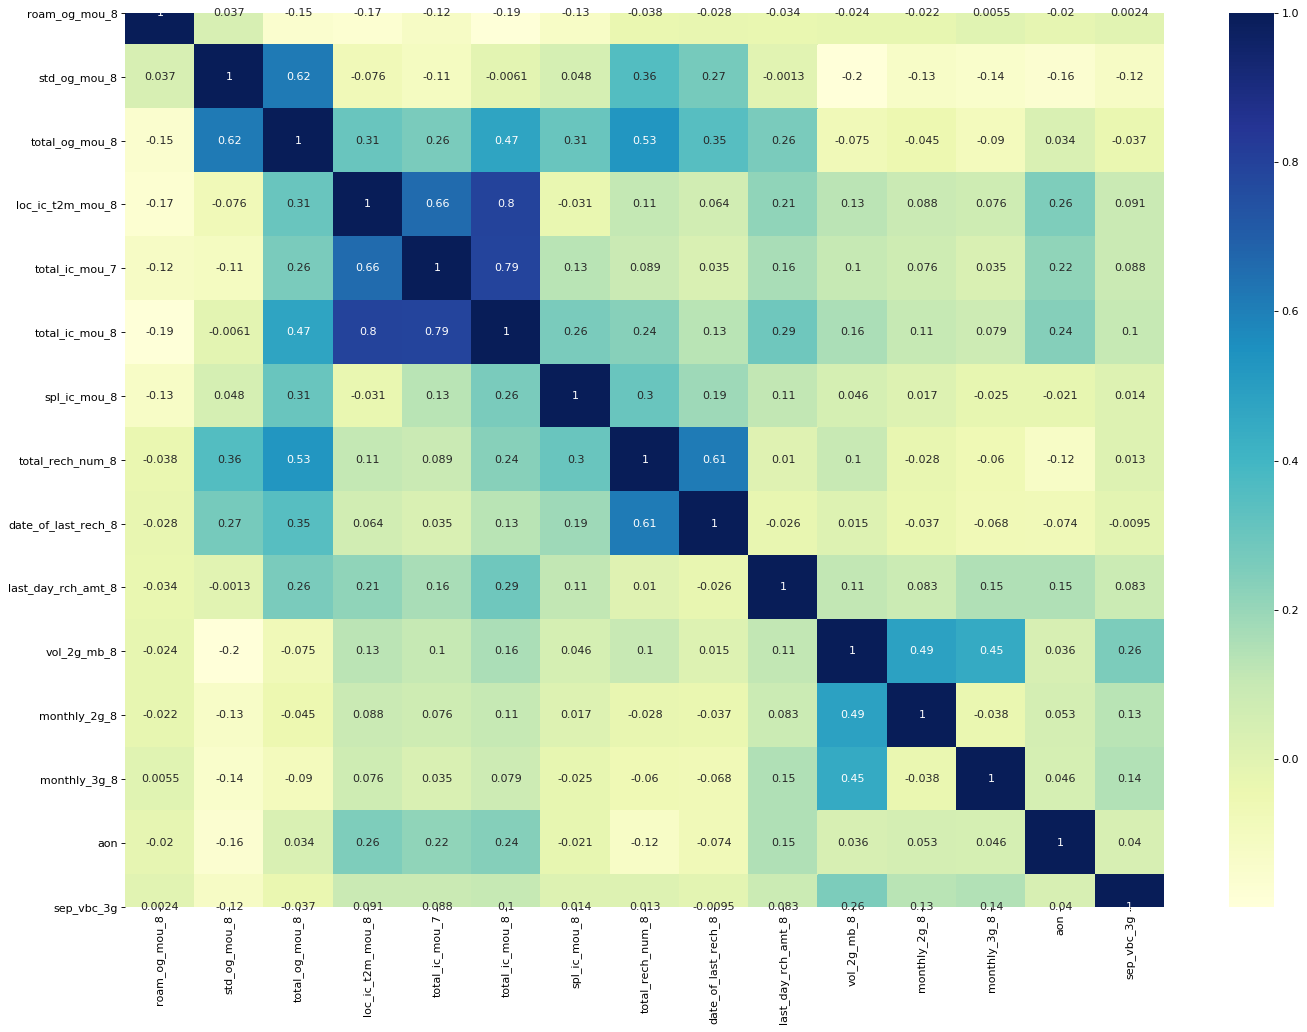

In [98]:
plt.figure(figsize=(18,13), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Removal of variables and updation of the Model

Some of the variable have high VIFs although the p-value of them are in a good state. Those variables are insignificant and can be dropped.

In [99]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['roam_og_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_8',
       'total_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'monthly_3g_8', 'aon', 'sep_vbc_3g'],
      dtype='object')

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20911
Model:                            GLM   Df Residuals:                    20896
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3396.9
Date:                Thu, 23 Jan 2020   Deviance:                       6793.7
Time:                        23:59:15   Pearson chi2:                 2.23e+13
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9528      0.064    -61.429      0.000      -4.079      -3.827
roam_og_mou_8           0.3661      0.034     10.664      0.000       0.299       0.433
std_og_mou_8            0.1959      0.068      2.891      0.004       0.063       0.329
total_og_mou_8         -0.5085      0.077     -6.609      0.000      -0.659      -0.358
loc_ic_t2m_mou_8       -0.8271      0.051    -16.301      0.000      -0.927      -0.728
total_ic_mou_7          0.2304      0.038      6.074      0.000       0.156       0.305
spl_ic_mou_8           -0.7317      0.049    -14.869      0.000      -0.828      -0.635
total_rech_num_8        0.2746      0.047      5.871      0.000       0.183       0.366
date_of_last_rech_8    -0.6836      0.040    -17.231      0.000      -0.761      -0.606
last_day_rch_amt_8     -0.5826      0.037    -15.819      0.000      -0.655      -0.510
vol_2g_mb_8            -0.2822      0.059     -4.807      0.000      -0.397      -0.167
monthly_2g_8           -0.2490      0.069     -3.598      0.000      -0.385      -0.113
monthly_3g_8           -0.3564      0.060     -5.949      0.000      -0.474      -0.239
aon                    -0.2616      0.036     -7.203      0.000      -0.333      -0.190
sep_vbc_3g             -0.7367      0.104     -7.083      0.000      -0.941      -0.533
=======================================================================================
"""

In [101]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.006869
1   0.058210
2   0.009967
3   0.072266
4   0.012556
5   0.001759
6   0.000303
7   0.165599
8   0.006720
9   0.218679
dtype: float64

In [102]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.006869   
1  0       0.058210   
2  0       0.009967   
3  0       0.072266   
4  0       0.012556

In [103]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.03871572920493404

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.006869     0        
1  0       0.058210     1        
2  0       0.009967     0        
3  0       0.072266     1        
4  0       0.012556     0

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[13995  5153]
 [  142  1621]]


In [106]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.7467839892879345


In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
2   total_og_mou_8      3.100000
1   std_og_mou_8        2.180000
6   total_rech_num_8    2.170000
3   loc_ic_t2m_mou_8    2.110000
9   vol_2g_mb_8         2.030000
4   total_ic_mou_7      1.900000
7   date_of_last_rech_8 1.610000
10  monthly_2g_8        1.510000
11  monthly_3g_8        1.470000
5   spl_ic_mou_8        1.290000
8   last_day_rch_amt_8  1.210000
12  aon                 1.140000
13  sep_vbc_3g          1.090000
0   roam_og_mou_8       1.080000

In [108]:
# Remove the Variable and Update the Model
col = col.drop('total_og_mou_8', 1)
col

Index(['roam_og_mou_8', 'std_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_8', 'date_of_last_rech_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'monthly_3g_8',
       'aon', 'sep_vbc_3g'],
      dtype='object')

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20911
Model:                            GLM   Df Residuals:                    20897
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3420.5
Date:                Thu, 23 Jan 2020   Deviance:                       6840.9
Time:                        23:59:15   Pearson chi2:                 2.85e+15
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9545      0.064    -61.879      0.000      -4.080      -3.829
roam_og_mou_8           0.4203      0.033     12.706      0.000       0.355       0.485
std_og_mou_8           -0.1587      0.038     -4.133      0.000      -0.234      -0.083
loc_ic_t2m_mou_8       -0.9695      0.046    -20.885      0.000      -1.060      -0.879
total_ic_mou_7          0.2184      0.038      5.784      0.000       0.144       0.292
spl_ic_mou_8           -0.9498      0.038    -24.814      0.000      -1.025      -0.875
total_rech_num_8        0.1983      0.045      4.435      0.000       0.111       0.286
date_of_last_rech_8    -0.6832      0.040    -17.259      0.000      -0.761      -0.606
last_day_rch_amt_8     -0.6348      0.036    -17.798      0.000      -0.705      -0.565
vol_2g_mb_8            -0.2615      0.059     -4.453      0.000      -0.377      -0.146
monthly_2g_8           -0.2541      0.069     -3.674      0.000      -0.390      -0.119
monthly_3g_8           -0.3440      0.060     -5.769      0.000      -0.461      -0.227
aon                    -0.2768      0.036     -7.673      0.000      -0.348      -0.206
sep_vbc_3g             -0.7363      0.103     -7.119      0.000      -0.939      -0.534
=======================================================================================
"""

In [110]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.005316
1   0.048690
2   0.013192
3   0.053828
4   0.016026
5   0.001464
6   0.000425
7   0.193308
8   0.003282
9   0.172278
dtype: float64

In [111]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.005316   
1  0       0.048690   
2  0       0.013192   
3  0       0.053828   
4  0       0.016026

In [112]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.038457057255317215

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.005316     0        
1  0       0.048690     1        
2  0       0.013192     0        
3  0       0.053828     1        
4  0       0.016026     0

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[13928  5220]
 [  137  1626]]


In [115]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.7438190426091531


In [116]:
#VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
8   vol_2g_mb_8         2.020000
2   loc_ic_t2m_mou_8    1.990000
5   total_rech_num_8    1.950000
3   total_ic_mou_7      1.870000
6   date_of_last_rech_8 1.610000
9   monthly_2g_8        1.510000
10  monthly_3g_8        1.470000
1   std_og_mou_8        1.280000
4   spl_ic_mou_8        1.200000
11  aon                 1.130000
7   last_day_rch_amt_8  1.110000
12  sep_vbc_3g          1.090000
0   roam_og_mou_8       1.050000

### Remove the Variable and Update the Model

In [117]:
col = col.drop('vol_2g_mb_8', 1)
col

Index(['roam_og_mou_8', 'std_og_mou_8', 'loc_ic_t2m_mou_8', 'total_ic_mou_7',
       'spl_ic_mou_8', 'total_rech_num_8', 'date_of_last_rech_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'aon',
       'sep_vbc_3g'],
      dtype='object')

In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20911
Model:                            GLM   Df Residuals:                    20898
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3431.3
Date:                Thu, 23 Jan 2020   Deviance:                       6862.5
Time:                        23:59:15   Pearson chi2:                 3.63e+15
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9459      0.064    -62.036      0.000      -4.071      -3.821
roam_og_mou_8           0.4235      0.033     12.856      0.000       0.359       0.488
std_og_mou_8           -0.1336      0.038     -3.525      0.000      -0.208      -0.059
loc_ic_t2m_mou_8       -0.9811      0.046    -21.139      0.000      -1.072      -0.890
total_ic_mou_7          0.2183      0.038      5.801      0.000       0.145       0.292
spl_ic_mou_8           -0.9531      0.038    -24.878      0.000      -1.028      -0.878
total_rech_num_8        0.1586      0.044      3.615      0.000       0.073       0.245
date_of_last_rech_8    -0.6813      0.040    -17.232      0.000      -0.759      -0.604
last_day_rch_amt_8     -0.6336      0.036    -17.790      0.000      -0.703      -0.564
monthly_2g_8           -0.3945      0.062     -6.395      0.000      -0.515      -0.274
monthly_3g_8           -0.4590      0.053     -8.622      0.000      -0.563      -0.355
aon                    -0.2727      0.036     -7.566      0.000      -0.343      -0.202
sep_vbc_3g             -0.7549      0.103     -7.343      0.000      -0.956      -0.553
=======================================================================================
"""

In [119]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.004010
1   0.047369
2   0.012690
3   0.049669
4   0.025499
5   0.001769
6   0.000412
7   0.181863
8   0.002958
9   0.165413
dtype: float64

In [120]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.004010   
1  0       0.047369   
2  0       0.012690   
3  0       0.049669   
4  0       0.025499

In [121]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.038314520123757606

In [122]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.004010     0        
1  0       0.047369     1        
2  0       0.012690     0        
3  0       0.049669     1        
4  0       0.025499     0

In [123]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[13864  5284]
 [  142  1621]]


In [124]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.740519343885993


In [125]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
2   loc_ic_t2m_mou_8    1.990000
5   total_rech_num_8    1.880000
3   total_ic_mou_7      1.870000
6   date_of_last_rech_8 1.610000
1   std_og_mou_8        1.250000
4   spl_ic_mou_8        1.200000
10  aon                 1.120000
7   last_day_rch_amt_8  1.110000
9   monthly_3g_8        1.070000
11  sep_vbc_3g          1.060000
0   roam_og_mou_8       1.050000
8   monthly_2g_8        1.050000

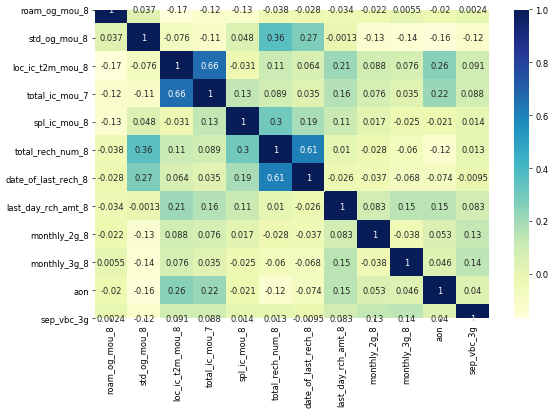

In [126]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## Our latest models features are as follows:

1. All variables have p-values equal to 0.
2. All the features have very low VIF values (less than 2) that means there is less muliticollinearity among the features as per heat map.
3. The overall accuracy of 0.74 at a probability threshold of 0.05 is quite acceptable. So we shouldn't drop more variables and we should proceed with the predictions using this model.

In [127]:
## Step 8: Calculating Sensitivity and Specificity

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.9194554736245036

In [130]:
# calculate specificity
TN / float(TN+FP)

0.7240442866095675

In [131]:
# false postive rate
print(FP/ float(TN+FP))

0.2759557133904324


In [132]:
# positive predicted value 
print (TP / float(TP+FP))

0.23475742215785664


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9898614879337427


In [134]:
### ROC Curve

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )

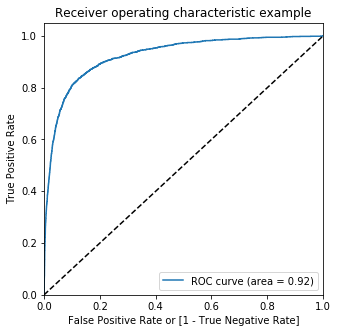

(array([0.        , 0.        , 0.        , ..., 0.99994778, 1.        ,
        1.        ]),
 array([0.00000000e+00, 5.67214974e-04, 1.13442995e-03, ...,
        9.99432785e-01, 9.99432785e-01, 1.00000000e+00]),
 array([1.96925569e+00, 9.69255694e-01, 9.68102017e-01, ...,
        5.09178936e-06, 4.09849106e-06, 2.75228866e-16]))

In [137]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

In [138]:
### The area under the curve

In [139]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [140]:
auc = auc_val(fpr,tpr)
auc

0.9244258325838695

In [141]:
## Step 10: Finding the Probablity Cutoff Point

In [142]:
# create columns with different probability cutoffs 
num = [float(x)/100 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted  0.0  0.01  0.02  0.03  0.04  0.05  0.06  \
0  0       0.004010     0          1    0     0     0     0     0     0      
1  0       0.047369     1          1    1     1     1     1     0     0      
2  0       0.012690     0          1    1     0     0     0     0     0      
3  0       0.049669     1          1    1     1     1     1     0     0      
4  0       0.025499     0          1    1     1     0     0     0     0      

   0.07  0.08  0.09  
0  0     0     0     
1  0     0     0     
2  0     0     0     
3  0     0     0     
4  0     0     0

In [143]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000 0.084310  1.000000 0.000000
0.010000 0.010000 0.445890  0.982984 0.396438
0.020000 0.020000 0.600689  0.960295 0.567579
0.030000 0.030000 0.691263  0.938174 0.668529
0.040000 0.040000 0.749845  0.916052 0.734541
0.050000 0.050000 0.788963  0.901872 0.778567
0.060000 0.060000 0.817464  0.883154 0.811416
0.070000 0.070000 0.838697  0.867839 0.836014
0.080000 0.080000 0.854909  0.852524 0.855128
0.090000 0.090000 0.868251  0.838344 0.871005


In [144]:
### Plot of the accuracy, sensitivity and specificity for various probabilities

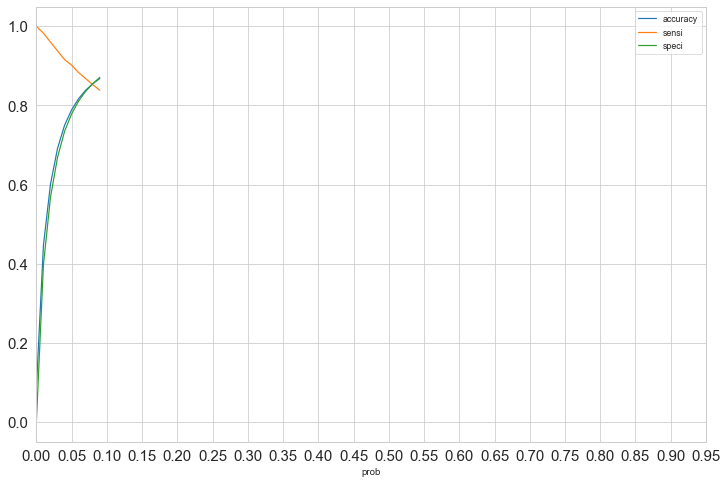

In [145]:
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(12,8))
plt.xticks(np.arange(0, 1, step=0.05), size = 15)
plt.yticks(size = 15)
plt.show()

In [146]:
### 0.09 is the optimum point to take it as a cutoff probability

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.09 else 0)

y_train_pred_final.head()

Churned  Churn_Prob  predicted  0.0  0.01  0.02  0.03  0.04  0.05  0.06  \
0  0       0.004010     0          1    0     0     0     0     0     0      
1  0       0.047369     1          1    1     1     1     1     0     0      
2  0       0.012690     0          1    1     0     0     0     0     0      
3  0       0.049669     1          1    1     1     1     1     0     0      
4  0       0.025499     0          1    1     1     0     0     0     0      

   0.07  0.08  0.09  final_predicted  
0  0     0     0     0                
1  0     0     0     0                
2  0     0     0     0                
3  0     0     0     0                
4  0     0     0     0

In [148]:
metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8682511596767252

In [149]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
confusion1

array([[16678,  2470],
       [  285,  1478]], dtype=int64)

In [150]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [151]:
#sensitivity 
TP / float(TP+FN)

0.8383437322745321

In [152]:
#specificity
TN / float(TN+FP)

0.8710048046793398

In [153]:
#false postive rate
print(FP/ float(TN+FP))

0.12899519532066012


In [154]:
# Positive predictive value 
print (TP / float(TP+FP))

0.37436676798378926


In [155]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9831987266403348


In [156]:
# Precision and Recall

In [157]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.37436676798378926

In [158]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8383437322745321

In [159]:
precision_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.37436676798378926

In [160]:
recall_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8383437322745321

In [161]:
y_train_pred_final.Churned, y_train_pred_final.final_predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       1
 28       0
 29       0
 30       0
 31       0
 32       0
 33       0
 34       0
 35       0
 36       0
 37       0
 38       0
 39       0
 40       0
 41       0
 42       0
 43       0
 44       0
 45       0
 46       0
 47       0
 48       0
 49       0
 50       0
 51       0
 52       0
 53       0
 54       0
 55       0
 56       0
 57       0
 58       0
 59       0
 60       0
 61       0
 62       0
 63       0
 64       0
 65       0
 66       0
 67       0
 68       0
 69       0
 70       0
 71       0
 72       0
 73       0
 74       0
 75       0
 76       0
 77       0
 78       0
 79       0
 80       0
 81       0
 82       0
 83 

In [162]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

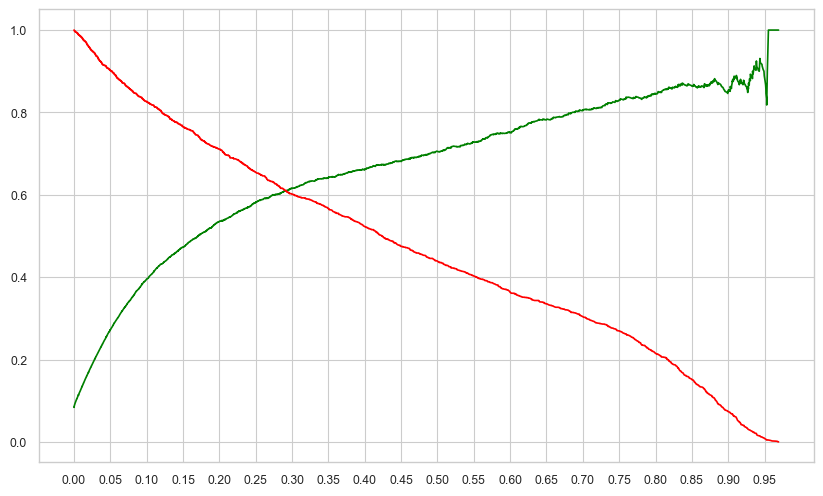

In [163]:
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

In [164]:
### The optimal threshold value is 0.29

In [165]:
# F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.5175976186307126

In [166]:
# Making predictions on the test set
X_test = X_test[col]
X_test.head()

roam_og_mou_8  std_og_mou_8  loc_ic_t2m_mou_8  total_ic_mou_7  \
0 -0.544571      -0.346907     -0.508828         -0.674279         
1 1.947386       -0.375218     0.312720          2.594787          
2 -0.544571      -0.317828     0.109627          0.616467          
3 -0.544571      1.247904      0.340042          -0.297740         
4 -0.544571      1.533471      -0.012158         0.158423          

   spl_ic_mou_8  total_rech_num_8  date_of_last_rech_8  last_day_rch_amt_8  \
0 -0.051187     -0.985622         -0.554182            0.784224              
1 -0.051187     0.045143          0.748568             0.085836              
2 2.538720      0.989984          0.368194             -0.391462             
3 -0.051187     0.989984          1.170033             0.085836              
4 -0.051187     0.640352          0.368194             0.708964              

   monthly_2g_8  monthly_3g_8       aon  sep_vbc_3g  
0 -0.339662     2.749894      1.416584  -0.303732    
1 -0.339662     -0.363507     -1.902582 -0.303732    
2 -0.339662     -0.363507     -0.771316 -0.303732    
3 -0.339662     -0.363507     -0.247958 -0.303732    
4 -0.339662     -0.363507     1.405598  -0.303732

In [167]:
X_test_sm = sm.add_constant(X_test)

In [168]:
y_test_pred = res.predict(X_test_sm)

In [169]:
y_test_pred[:10]

0   0.005015
1   0.093563
2   0.003569
3   0.008246
4   0.008683
5   0.033027
6   0.000347
7   0.376985
8   0.032770
9   0.023519
dtype: float64

In [170]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [171]:
y_pred_1.head()

0
0 0.005015
1 0.093563
2 0.003569
3 0.008246
4 0.008683

In [172]:
y_test_df = pd.DataFrame(y_test)

In [173]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [174]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [175]:
y_pred_final.head()

churn_data        0
0  0          0.005015
1  0          0.093563
2  0          0.003569
3  0          0.008246
4  0          0.008683

In [176]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [177]:
y_pred_final.head()

churn_data  Churn_Prob
0  0          0.005015   
1  0          0.093563   
2  0          0.003569   
3  0          0.008246   
4  0          0.008683

In [178]:
y_pred_final.shape

(8962, 2)

In [179]:
# Using the probability threshold value 0f 0.029 on the test dataset to predict if a churn will take place.

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.29 else 0)

In [180]:
y_pred_final.head()

churn_data  Churn_Prob  final_predicted
0  0          0.005015     0              
1  0          0.093563     1              
2  0          0.003569     0              
3  0          0.008246     0              
4  0          0.008683     0

In [181]:
#accuracy.
acc_score=metrics.accuracy_score(y_pred_final.churn_data, y_pred_final.final_predicted)
acc_score

0.6999553671055568

In [182]:
confusion_test = metrics.confusion_matrix(y_pred_final.churn_data, y_pred_final.final_predicted )
print(confusion_test)

[[5537 2636]
 [  53  736]]


In [183]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [184]:
#sensitivity
TP / float(TP+FN)

0.9328263624841572

In [185]:
#specificity
TN / float(TN+FP)

0.6774746115257555

In [186]:
# false postive rate
print(FP/ float(TN+FP))

0.32252538847424445


In [187]:
# Positive predictive value 
print (TP / float(TP+FP))

0.21826809015421114


In [188]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9905187835420394


In [189]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.21826809015421114

In [190]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.9328263624841572

In [191]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.3537611151165585

In [192]:
print(classification_report(y_pred_final.churn_data, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      8173
           1       0.22      0.93      0.35       789

    accuracy                           0.70      8962
   macro avg       0.60      0.81      0.58      8962
weighted avg       0.92      0.70      0.76      8962



In [193]:
# Cross Validation Score To avoid overfitting, calculate the Cross Validation Score to see how our model performs

In [194]:
lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.92869099 0.93103448 0.93203883 0.93203883 0.93304319 0.93538668
 0.9354083  0.93605624 0.93639103 0.93710271]
0.933719129102118


In [195]:
# ROC for test data set
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [196]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn_data, y_pred_final.Churn_Prob, drop_intermediate = False )

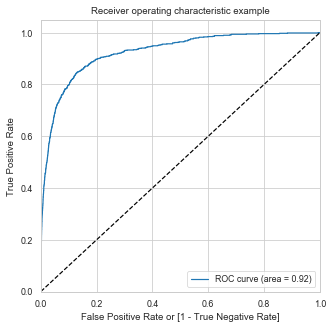

(array([0.00000000e+00, 1.22354093e-04, 2.44708185e-04, ...,
        9.99755292e-01, 9.99877646e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.97578162e+00, 9.75781625e-01, 9.72855805e-01, ...,
        9.28674728e-06, 7.16927859e-06, 8.60873314e-07]))

In [197]:
draw_roc(y_pred_final.churn_data, y_pred_final.Churn_Prob)

In [198]:
# Area under curve
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [199]:
auc = auc_val(fpr,tpr)
auc

0.9248316313088397

As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Auc is 0.9248, our model seems to be doing well on the test dataset.

In [200]:
### Feature Importance
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

roam_og_mou_8         0.42 
std_og_mou_8          -0.13
loc_ic_t2m_mou_8      -0.98
total_ic_mou_7        0.22 
spl_ic_mou_8          -0.95
total_rech_num_8      0.16 
date_of_last_rech_8   -0.68
last_day_rch_amt_8    -0.63
monthly_2g_8          -0.39
monthly_3g_8          -0.46
aon                   -0.27
sep_vbc_3g            -0.75
dtype: float64

In [201]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

roam_og_mou_8         100.00 
std_og_mou_8          -31.54 
loc_ic_t2m_mou_8      -231.65
total_ic_mou_7        51.54  
spl_ic_mou_8          -225.04
total_rech_num_8      37.46  
date_of_last_rech_8   -160.85
last_day_rch_amt_8    -149.61
monthly_2g_8          -93.15 
monthly_3g_8          -108.37
aon                   -64.38 
sep_vbc_3g            -178.24
dtype: float64

In [202]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

roam_og_mou_8          2 
std_og_mou_8           4 
loc_ic_t2m_mou_8       11
total_ic_mou_7         6 
spl_ic_mou_8           7 
total_rech_num_8       9 
date_of_last_rech_8    8 
last_day_rch_amt_8     10
monthly_2g_8           1 
monthly_3g_8           5 
aon                    3 
sep_vbc_3g             0 
dtype: int64

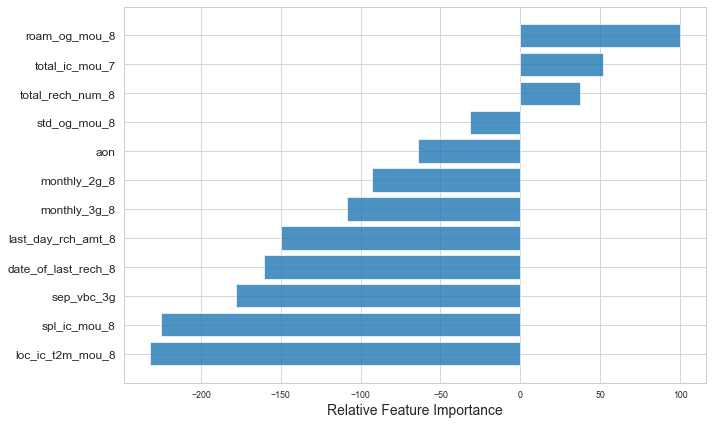

In [203]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [204]:
### Top 3 feature selection.
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
0  roam_og_mou_8    100.00
3  total_ic_mou_7   51.54 
5  total_rech_num_8 37.46